In [ ]:
#Hafila  UPDATED ON 11/29/24

# Descriptive Analysis

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
AAPL = pd.read_csv("apple.csv")
META = pd.read_csv("meta.csv")
TSLA = pd.read_csv("Tesla.csv")
AMZ = pd.read_csv("Amazon.csv") #Amazon
NFLX = pd.read_csv("netflix.csv")

Descriptive analytics for each project involve appropriate data visualization, identifying
and handling outliers and missing values.
• You will be granted 2 bonus points for finding any other data sources suitable for topics
1, 2, 4, or 10.
• You will be granted 3 bonus points for formulating different prescriptive analytics
questions appropriate for topics 1 to 10, inclusively.


# APPLE DATASET ANALYSIS

In [83]:
AAPL.head()

Date     Close    Volume      Open      High       Low
0  11/7/2023  $181.82   70529970  $179.18   $182.44   $178.97 
1  11/6/2023  $179.23   63841310  $176.38   $179.43   $176.21 
2  11/3/2023  $176.65   79829250  $174.24   $176.82   $173.35 
3  11/2/2023  $177.57   77334750  $175.52   $177.78   $175.46 
4  11/1/2023  $173.97   56934910  $171.00   $174.23   $170.12

In [84]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1257 non-null   object
 1   Close   1257 non-null   object
 2   Volume  1257 non-null   int64 
 3   Open    1257 non-null   object
 4   High    1257 non-null   object
 5   Low     1257 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [85]:
#Converting Object datatype to type float
AAPL['Close'] = AAPL['Close'].str.replace('$', '').str.replace(' ', '').astype(float)
AAPL['Open'] = AAPL['Open'].str.replace('$', '').str.replace(' ', '').astype(float)
AAPL['High'] = AAPL['High'].str.replace('$', '').str.replace(' ', '').astype(float)
AAPL['Low'] = AAPL['Low'].str.replace('$', '').str.replace(' ', '').astype(float)

#Converting Object datatype to type datetime

AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [86]:
AAPL.describe()

Date        Close        Volume         Open  \
count                           1257  1257.000000  1.257000e+03  1257.000000   
mean   2021-05-10 05:57:25.346062080   118.851400  1.052569e+08   118.734248   
min              2018-11-08 00:00:00    35.550000  3.134660e+07    36.000000   
25%              2020-02-11 00:00:00    70.790000  7.020791e+07    70.450000   
50%              2021-05-11 00:00:00   131.880000  9.060155e+07   131.780000   
75%              2022-08-09 00:00:00   155.110000  1.240135e+08   154.970000   
max              2023-11-07 00:00:00   196.450000  4.268848e+08   196.240000   
std                              NaN    46.798022  5.402839e+07    46.763112   

              High          Low  
count  1257.000000  1257.000000  
mean    120.133357   117.439761  
min      36.430000    35.500000  
25%      71.460000    69.700000  
50%     133.410000   130.210000  
75%     157.090000   153.350000  
max     198.230000   195.280000  
std      47.241569    46.317521

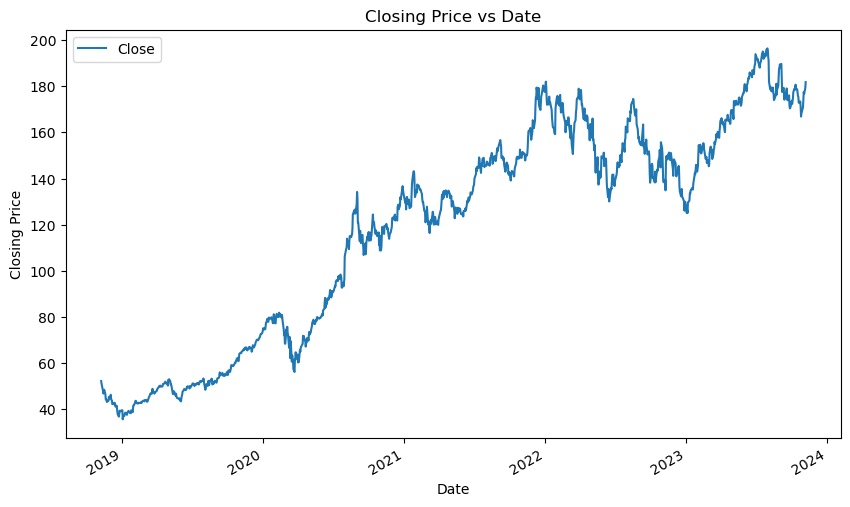

In [87]:
# Let's see a historical view of the closing price

AAPL.plot(x='Date', y='Close', figsize=(10, 6), title='Closing Price vs Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

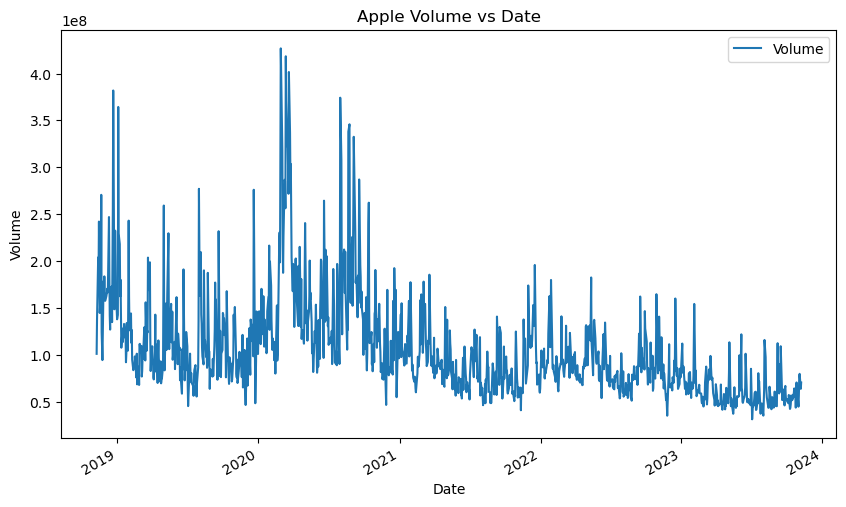

In [88]:
# Now let's plot the total volume of stock being traded each day over the past 5 year

AAPL.plot(x='Date', y='Volume', figsize=(10, 6), title='Apple Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

C:\Users\kce52\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


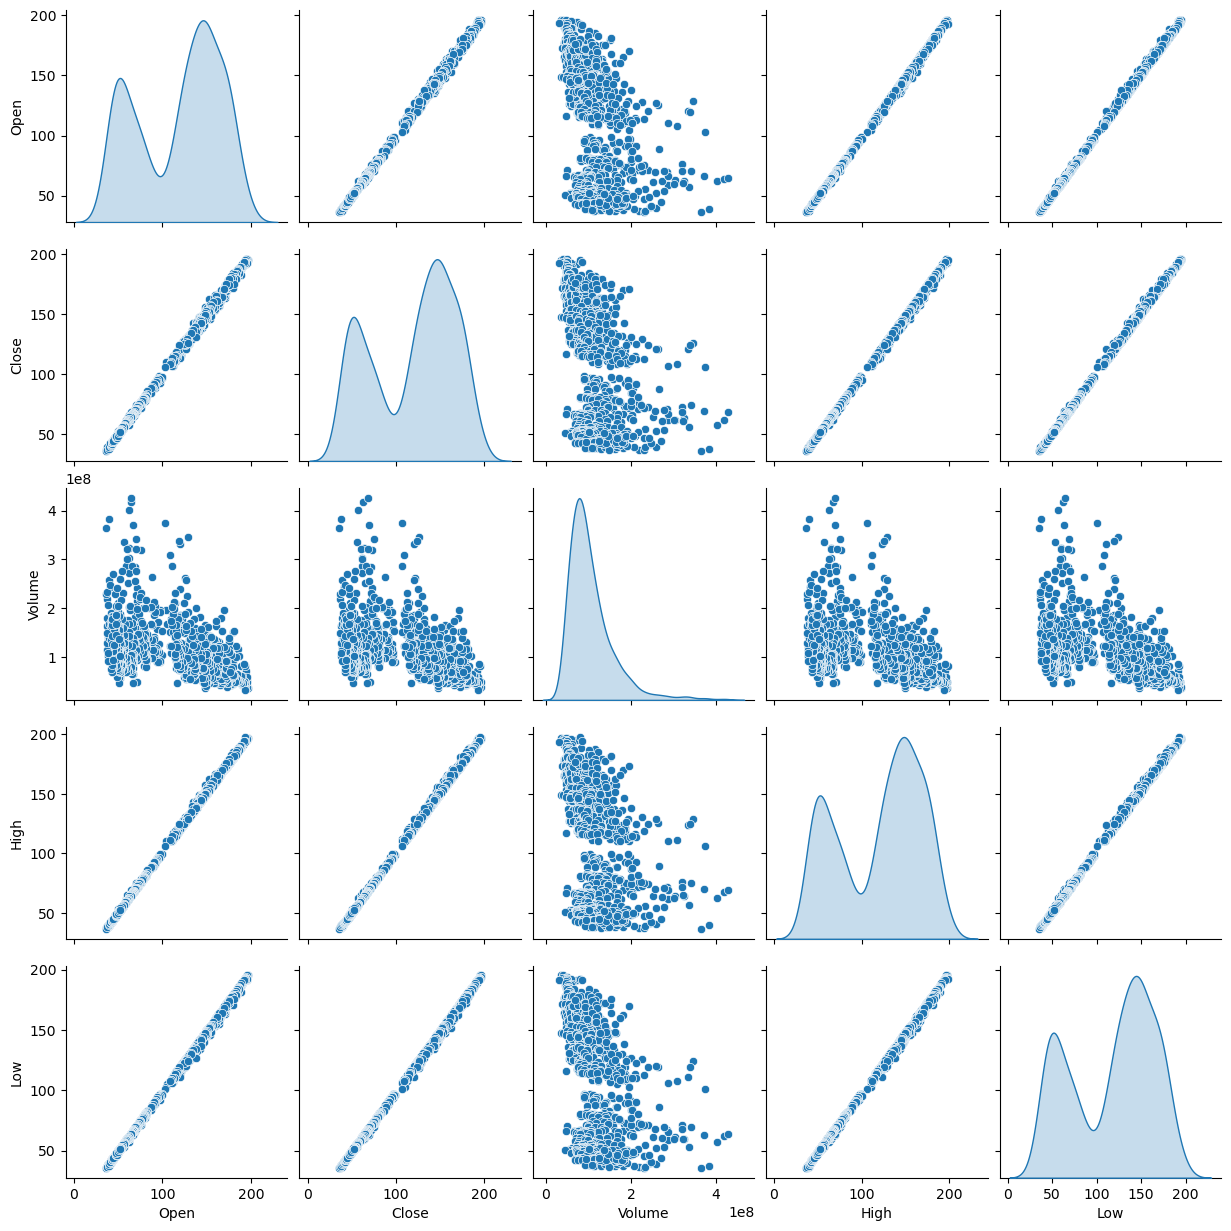

In [89]:
# sns.pairplot can be particularly useful for visualizing relationships and patterns between different stock variables or features.
sns.pairplot(AAPL[['Open','Close', 'Volume', 'High', 'Low']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Low')

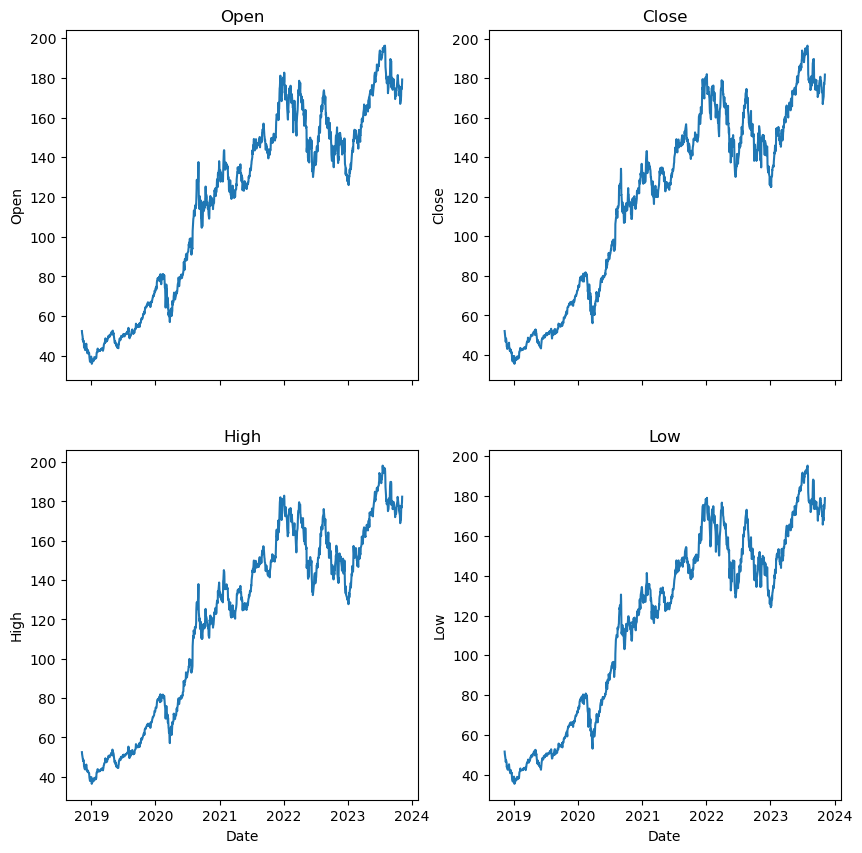

In [90]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
sns.lineplot(ax=axes[0, 0], data = AAPL, x='Date', y='Open')
axes[0,0].set_title('Open')
sns.lineplot(ax=axes[0, 1], data = AAPL, x='Date', y='Close')
axes[0,1].set_title('Close')
sns.lineplot(ax=axes[1, 0], data = AAPL, x='Date', y='High')
axes[1,0].set_title('High')
sns.lineplot(ax=axes[1, 1], data = AAPL, x='Date', y='Low')
axes[1,1].set_title('Low')

For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

#### Section 2 - Daily Return Analysis

Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.

<Axes: >

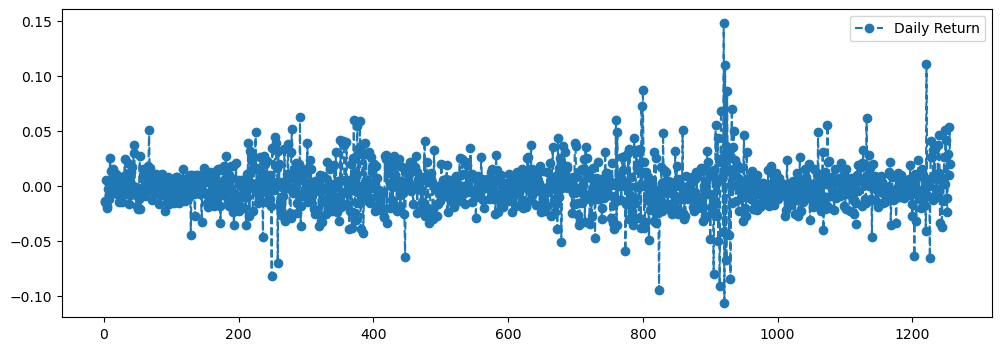

In [91]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

# Forecasting the stocks of Apple

In [92]:
# Convert 'Date' column to datetime format and 'Close' to numeric after removing '$' sign and commas
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AAPL['Close'] = AAPL['Close'].replace('[\$,]', '', regex=True).astype(float)

# Set 'Date' as the index
AAPL.set_index('Date', inplace=True)

# Resample by week and calculate mean of 'Close'
weekly_mean = AAPL['Close'].resample('W').mean()

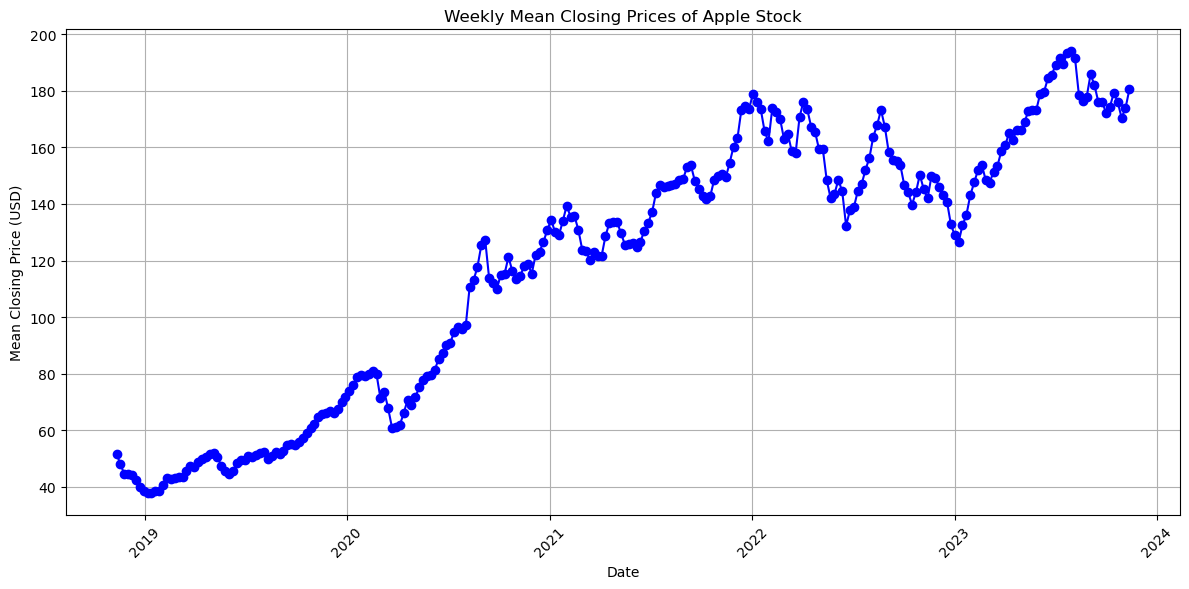

In [93]:
import matplotlib.pyplot as plt

# Plotting the weekly mean closing prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean, marker='o', linestyle='-', color='b')
plt.title('Weekly Mean Closing Prices of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


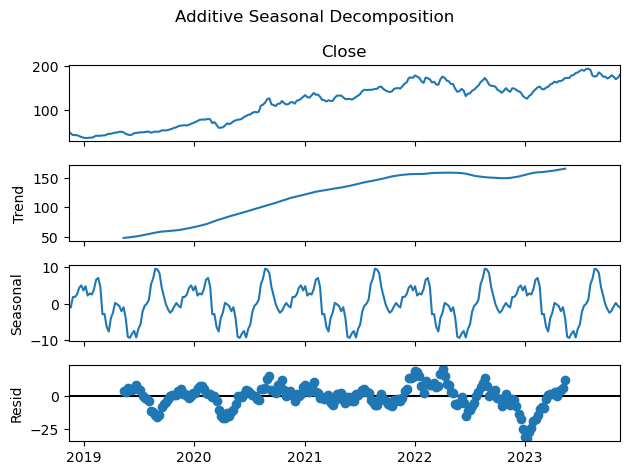

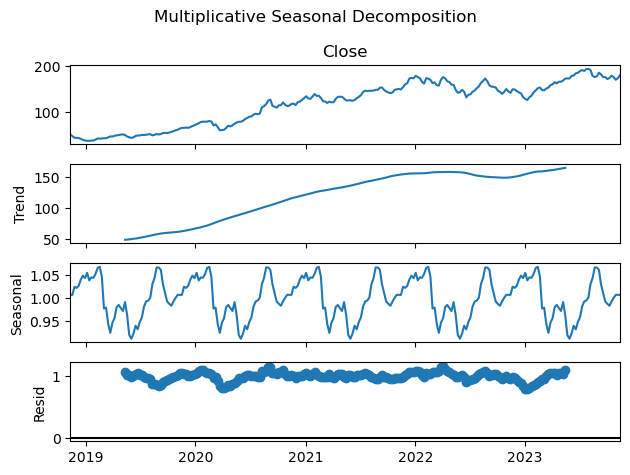

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition using additive model
decompose_additive = seasonal_decompose(weekly_mean, model='additive', period=52)

# Decomposition using multiplicative model
decompose_multiplicative = seasonal_decompose(weekly_mean, model='multiplicative', period=52)

# Plotting the results for additive model
decompose_additive.plot()
plt.suptitle('Additive Seasonal Decomposition')
plt.tight_layout()

# Plotting the results for multiplicative model
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decomposition')
plt.tight_layout()

plt.show()


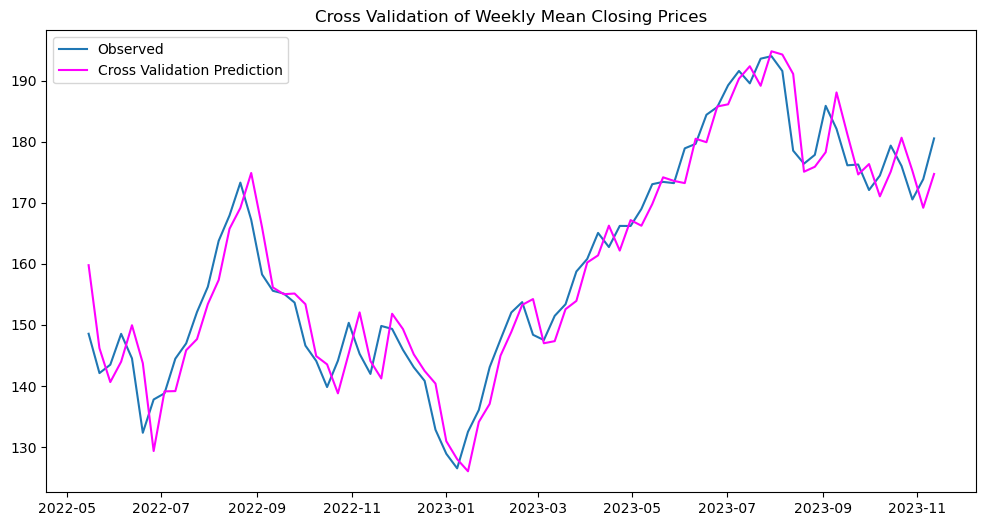

4.691435655948806

In [95]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

# Using the 'weekly_mean' series for the analysis
series = weekly_mean

# Splitting the data into training and test sets
historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

# Converting 'historic' to a list for compatibility with the forecasting loop
historic = historic.to_list()

# Predictions using an autoregressive model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 13, old_names=False)
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test.iloc[i])  # Append actual observation to the historic data

# Creating a Series for the predictions
cross_val = pd.Series(predictions, index=test.index)

# Calculating RMSE
test_score = mean_squared_error(test, cross_val, squared=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation Prediction')
plt.title('Cross Validation of Weekly Mean Closing Prices')
plt.legend()
plt.show()

test_score  # Displaying the RMSE value


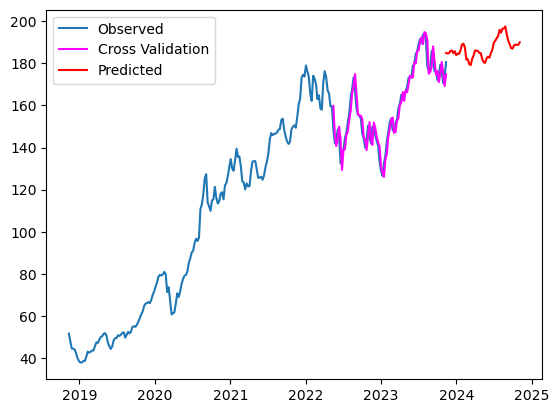

In [96]:
 ## Prediction for the future
historic = series
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2023-11-07", periods=n_pred, freq="w")

sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))
predictions = pd.Series(pred.values, index=date_pred)
# plot results
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 10)
plt.show()

# META DATA ANALYSIS

In [9]:
META.head()

Date   Close    Volume    Open    High     Low
0 2023-11-07  318.82  14055610  317.06  321.00  315.12
1 2023-11-06  315.80  12887700  315.98  318.33  314.45
2 2023-11-03  314.60  16764320  312.55  315.55  311.02
3 2023-11-02  310.87  21631820  317.30  318.82  308.33
4 2023-11-01  311.85  20434580  301.85  312.74  301.85

In [10]:
# General Info
META.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Close   1257 non-null   float64       
 2   Volume  1257 non-null   int64         
 3   Open    1257 non-null   float64       
 4   High    1257 non-null   float64       
 5   Low     1257 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [13]:
#Converting Object datatype to type float
META['Close'] = META['Close'].str.replace('$', '').str.replace(' ', '').astype(float)
META['Open'] = META['Open'].str.replace('$', '').str.replace(' ', '').astype(float)
META['High'] = META['High'].str.replace('$', '').str.replace(' ', '').astype(float)
META['Low'] = META['Low'].str.replace('$', '').str.replace(' ', '').astype(float)

#Converting Object datatype to type datetime

META['Date'] = pd.to_datetime(META['Date'])

In [14]:
META.describe()

Date        Close        Volume         Open  \
count                           1257  1257.000000  1.257000e+03  1257.000000   
mean   2021-05-10 05:57:25.346062080   230.194169  2.377128e+07   230.072474   
min              2018-11-08 00:00:00    88.910000  6.046273e+06    90.080000   
25%              2020-02-11 00:00:00   177.820000  1.510751e+07   178.180000   
50%              2021-05-11 00:00:00   213.140000  2.011813e+07   212.820000   
75%              2022-08-09 00:00:00   287.520000  2.788779e+07   287.250000   
max              2023-11-07 00:00:00   382.180000  2.323166e+08   381.680000   
std                              NaN    69.025523  1.561862e+07    69.101704   

              High          Low  
count  1257.000000  1257.000000  
mean    233.397741   226.949960  
min      90.460000    88.090000  
25%     180.170000   175.880000  
50%     215.280000   210.000000  
75%     291.780000   283.630000  
max     384.330000   378.810000  
std      69.632060    68.413518

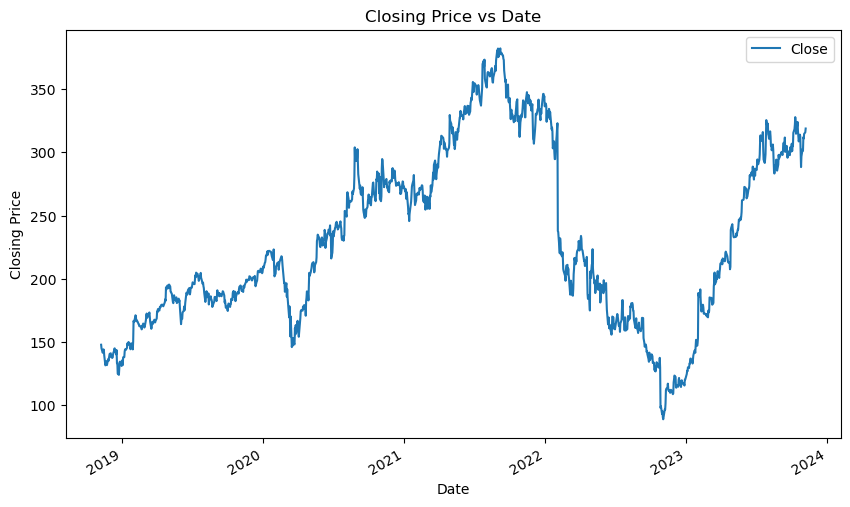

In [15]:
# Let's see a historical view of the closing price

META.plot(x='Date', y='Close', figsize=(10, 6), title='Closing Price vs Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

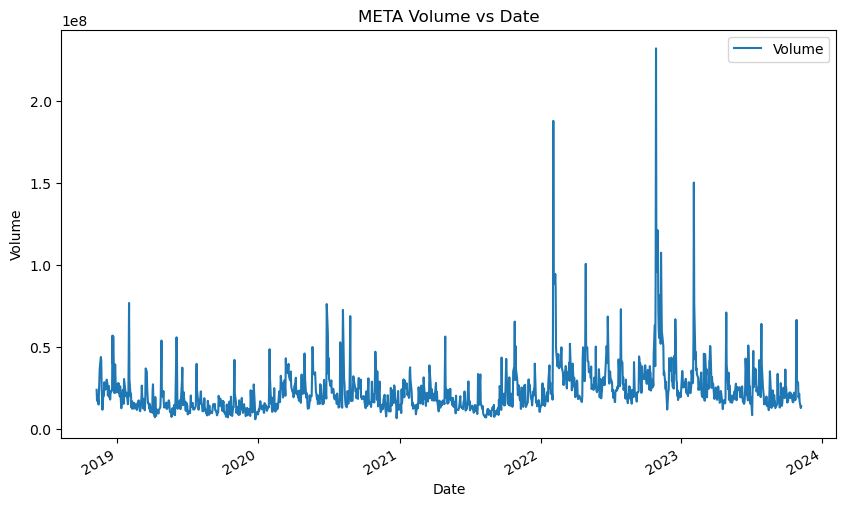

In [16]:
# Now let's plot the total volume of stock being traded each day over the past 5 year

META.plot(x='Date', y='Volume', figsize=(10, 6), title='META Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

C:\Users\kce52\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


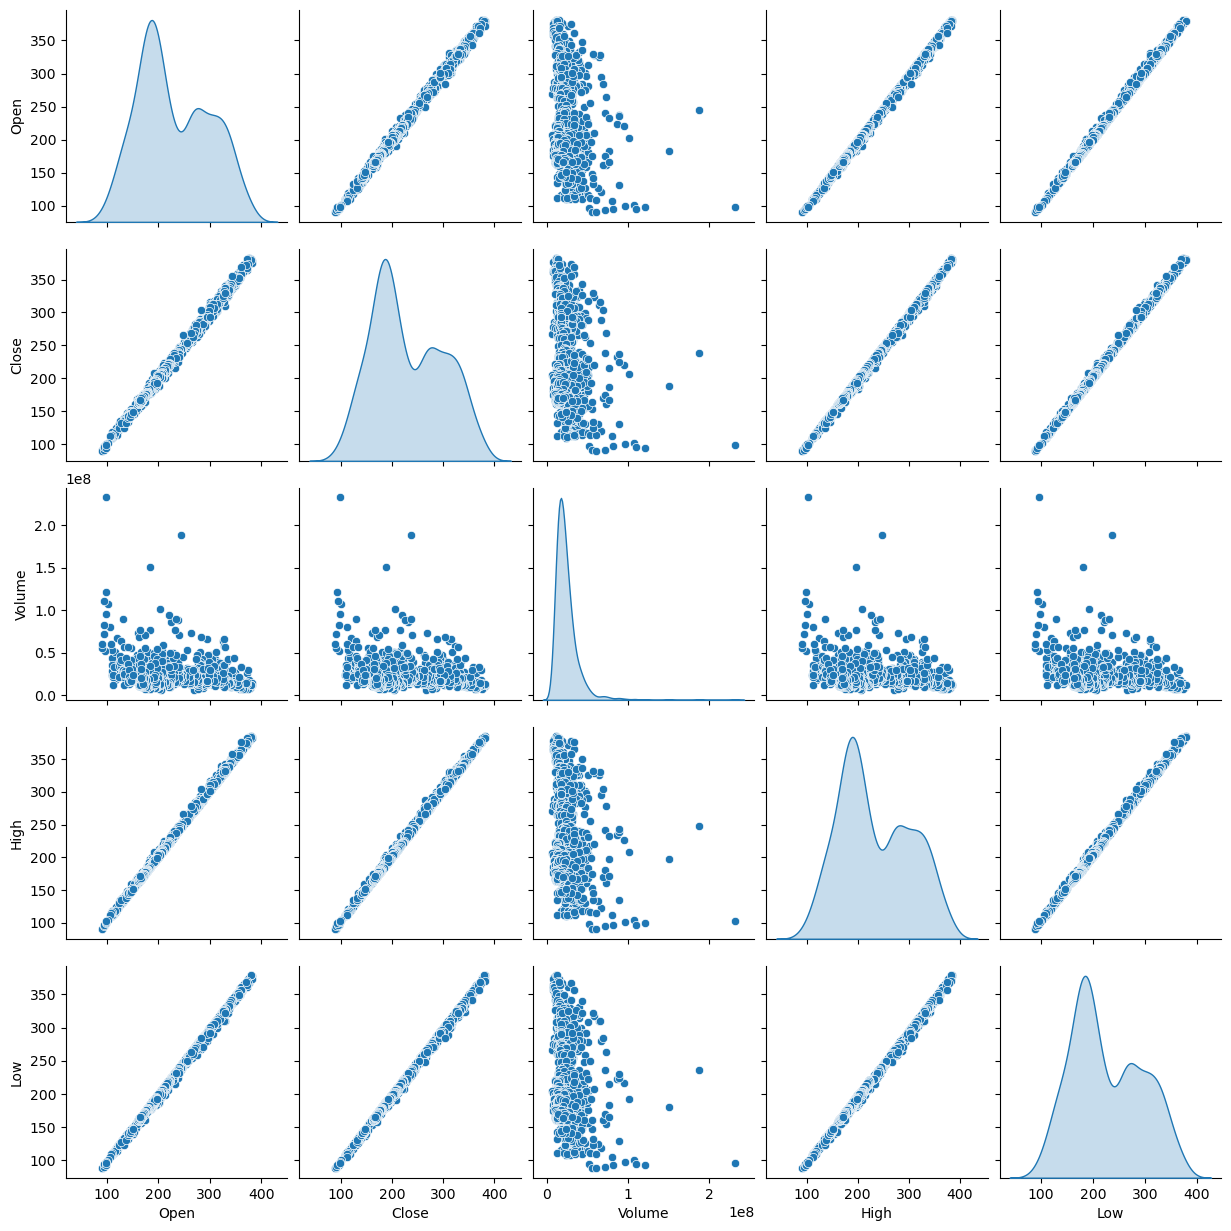

In [17]:
# sns.pairplot can be particularly useful for visualizing relationships and patterns between different stock variables or features.
sns.pairplot(META[['Open','Close', 'Volume', 'High', 'Low']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Low')

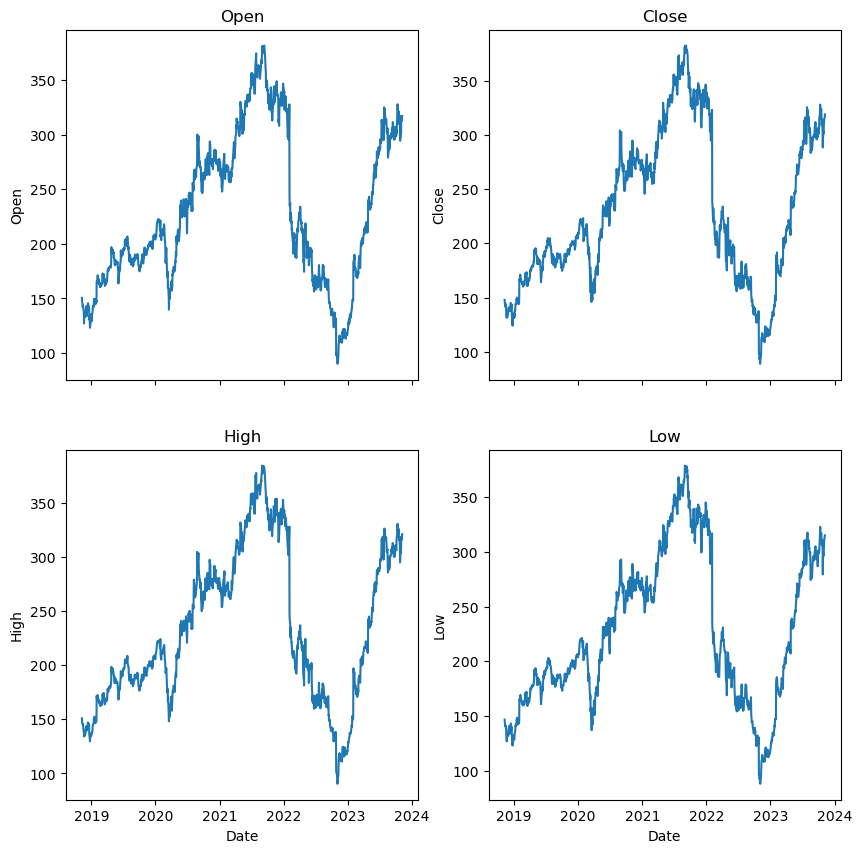

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
sns.lineplot(ax=axes[0, 0], data = META, x='Date', y='Open')
axes[0,0].set_title('Open')
sns.lineplot(ax=axes[0, 1], data = META, x='Date', y='Close')
axes[0,1].set_title('Close')
sns.lineplot(ax=axes[1, 0], data = META, x='Date', y='High')
axes[1,0].set_title('High')
sns.lineplot(ax=axes[1, 1], data = META, x='Date', y='Low')
axes[1,1].set_title('Low')

Section 2 - Daily Return Analysis

<Axes: >

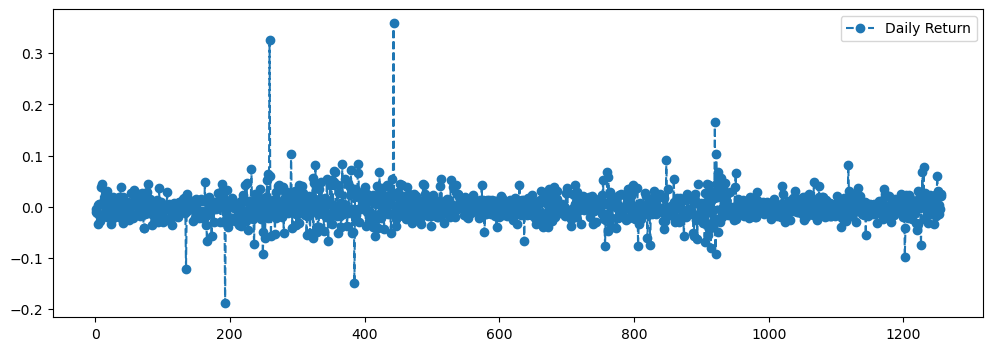

In [19]:
# We'll use pct_change to find the percent change for each day
META['Daily Return'] = META['Close'].pct_change()

# Lets plot the daily return percentage
META['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

# Forecasting the stocks of META

In [97]:
# Convert 'Date' column to datetime format and 'Close' to numeric after removing '$' sign and commas
META['Date'] = pd.to_datetime(META['Date'])
META['Close'] = META['Close'].replace('[\$,]', '', regex=True).astype(float)

# Set 'Date' as the index
META.set_index('Date', inplace=True)

# Resample by week and calculate mean of 'Close'
weekly_mean = META['Close'].resample('W').mean()
# Display the first few rows of the resulting series
weekly_mean

Date
2018-11-11    146.4150
2018-11-18    142.2620
2018-11-25    132.6325
2018-12-02    137.4860
2018-12-09    139.0175
                ...   
2023-10-15    321.3740
2023-10-22    316.7160
2023-10-29    302.2340
2023-11-05    308.2500
2023-11-12    317.3100
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

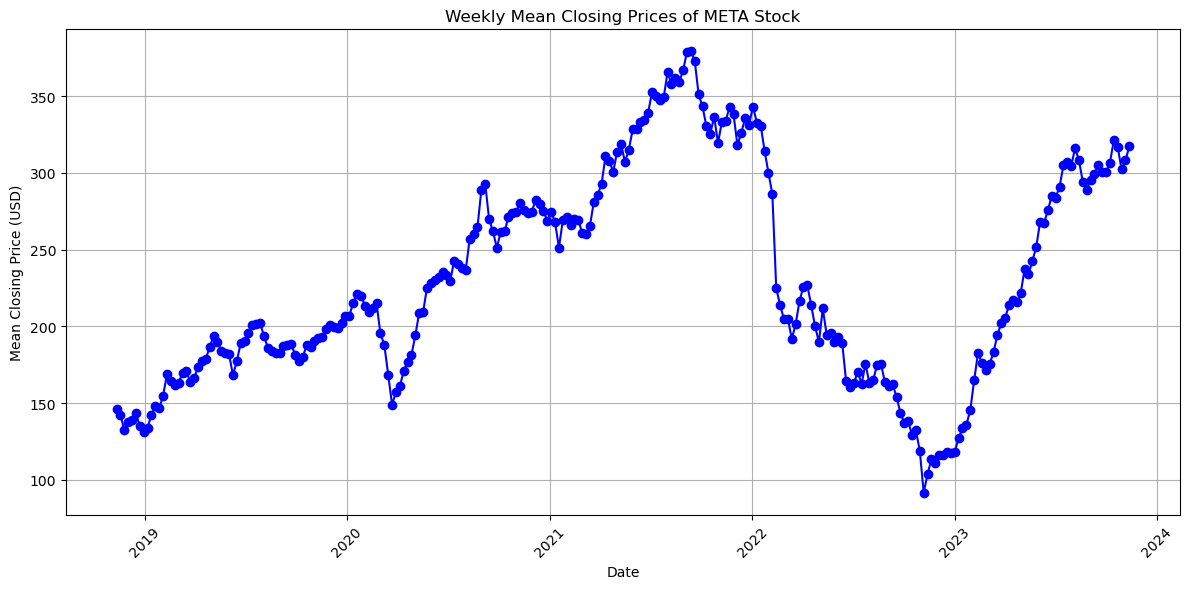

In [21]:
import matplotlib.pyplot as plt

# Plotting the weekly mean closing prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean, marker='o', linestyle='-', color='b')
plt.title('Weekly Mean Closing Prices of META Stock')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


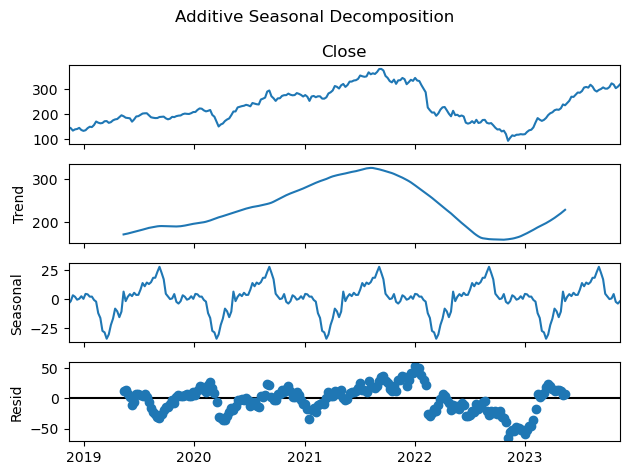

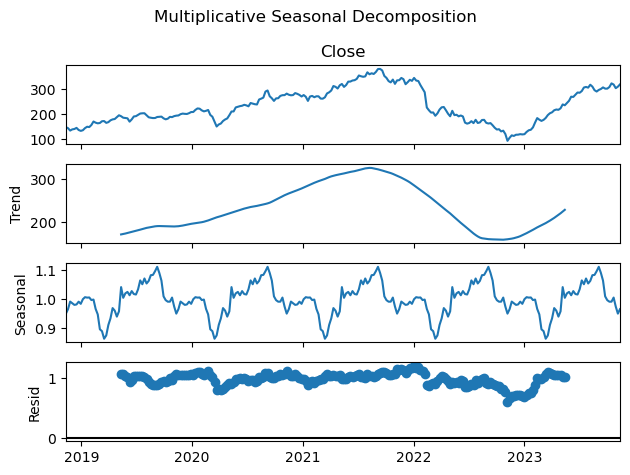

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition using additive model
decompose_additive = seasonal_decompose(weekly_mean, model='additive', period=52)

# Decomposition using multiplicative model
decompose_multiplicative = seasonal_decompose(weekly_mean, model='multiplicative', period=52)

# Plotting the results for additive model
decompose_additive.plot()
plt.suptitle('Additive Seasonal Decomposition')
plt.tight_layout()

# Plotting the results for multiplicative model
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decomposition')
plt.tight_layout()

plt.show()


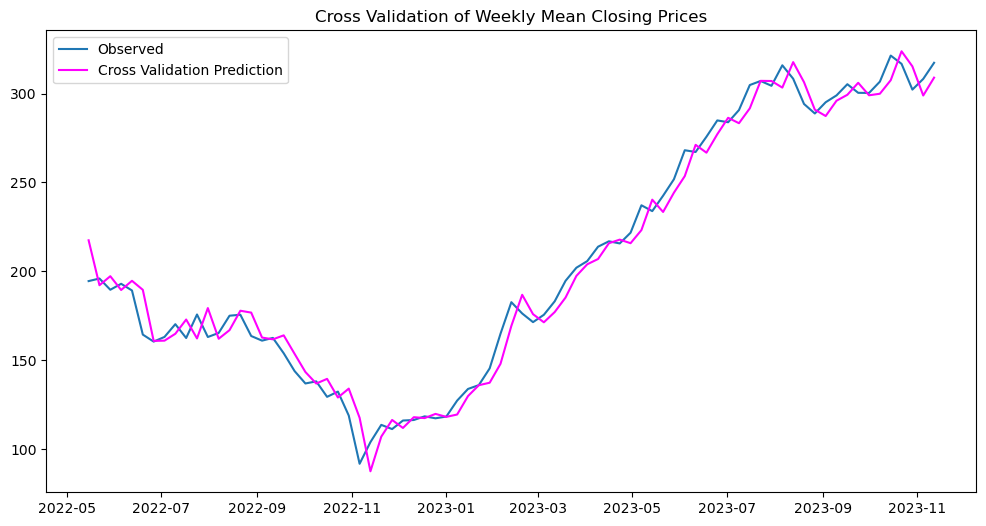

9.329115666078298

In [27]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

# Using the 'weekly_mean' series for the analysis
series = weekly_mean

# Splitting the data into training and test sets
historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

# Converting 'historic' to a list for compatibility with the forecasting loop
historic = historic.to_list()

# Predictions using an autoregressive model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 13, old_names=False)
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test.iloc[i])  # Append actual observation to the historic data

# Creating a Series for the predictions
cross_val = pd.Series(predictions, index=test.index)

# Calculating RMSE
test_score = mean_squared_error(test, cross_val, squared=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation Prediction')
plt.title('Cross Validation of Weekly Mean Closing Prices')
plt.legend()
plt.show()

test_score  # Displaying the RMSE value


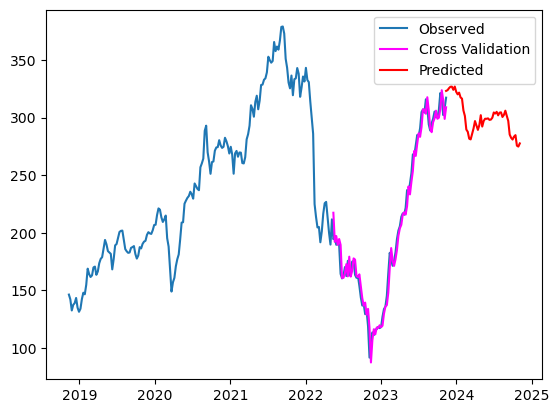

In [28]:
## Prediction for the future
historic = series
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2023-11-07", periods=n_pred, freq="w")
sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)

sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))
predictions = pd.Series(pred.values, index=date_pred)
# plot results
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 10)
plt.show()

# Tesla DATASET ANALYSIS


In [29]:
TSLA.head()

Date     Close     Volume      Open      High       Low
0  11/7/2023  $222.18   116900100  $219.98   $223.12   $215.72 
1  11/6/2023  $219.27   117335800  $223.98   $226.32   $215.00 
2  11/3/2023  $219.96   119534800  $221.15   $226.37   $218.40 
3  11/2/2023  $218.51   125987600  $212.97   $219.20   $211.45 
4  11/1/2023  $205.66   121661700  $204.04   $205.99   $197.85

In [30]:
# General Info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1257 non-null   object
 1   Close   1257 non-null   object
 2   Volume  1257 non-null   int64 
 3   Open    1257 non-null   object
 4   High    1257 non-null   object
 5   Low     1257 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [31]:
#Converting Object datatype to type float
TSLA['Close'] = TSLA['Close'].str.replace('$', '').str.replace(' ', '').astype(float)
TSLA['Open'] = TSLA['Open'].str.replace('$', '').str.replace(' ', '').astype(float)
AAPL['High'] = TSLA['High'].str.replace('$', '').str.replace(' ', '').astype(float)
TSLA['Low'] = TSLA['Low'].str.replace('$', '').str.replace(' ', '').astype(float)

#Converting Object datatype to type datetime

TSLA['Date'] = pd.to_datetime(TSLA['Date'])

In [32]:
TSLA.describe()

Date        Close        Volume         Open  \
count                           1257  1257.000000  1.257000e+03  1257.000000   
mean   2021-05-10 05:57:25.346062080   164.761368  1.336793e+08   164.820772   
min              2018-11-08 00:00:00    11.930000  2.940168e+07    12.070000   
25%              2020-02-11 00:00:00    35.950000  7.964587e+07    36.280000   
50%              2021-05-11 00:00:00   192.220000  1.088617e+08   191.940000   
75%              2022-08-09 00:00:00   250.970000  1.586991e+08   250.050000   
max              2023-11-07 00:00:00   409.970000  9.140809e+08   411.470000   
std                              NaN   110.304748  8.569572e+07   110.457057   

               Low  
count  1257.000000  
mean    160.768138  
min      11.800000  
25%      34.450000  
50%     187.070000  
75%     244.450000  
max     405.670000  
std     107.743036

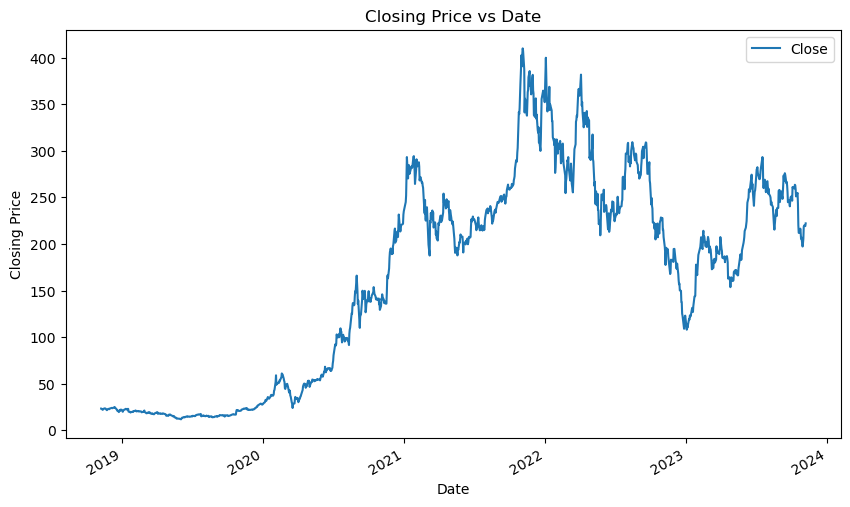

In [33]:
# Let's see a historical view of the closing price

TSLA.plot(x='Date', y='Close', figsize=(10, 6), title='Closing Price vs Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

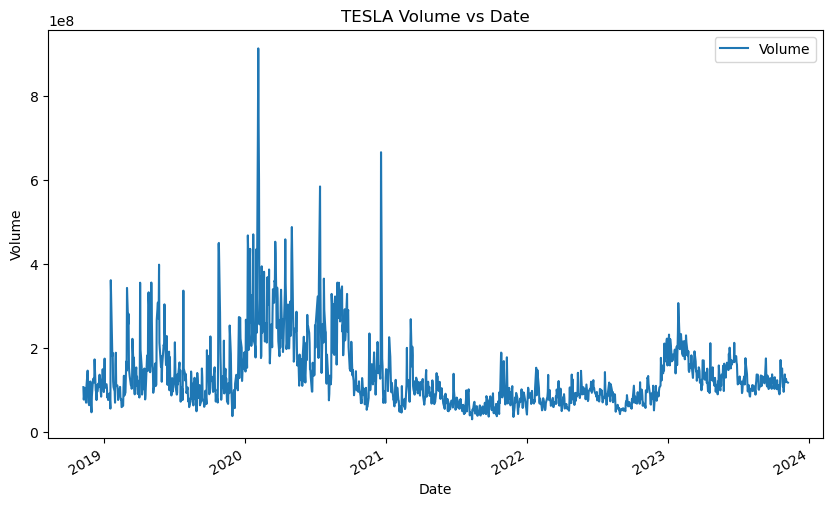

In [34]:
# Now let's plot the total volume of stock being traded each day over the past 5 year

TSLA.plot(x='Date', y='Volume', figsize=(10, 6), title='TESLA Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

C:\Users\kce52\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


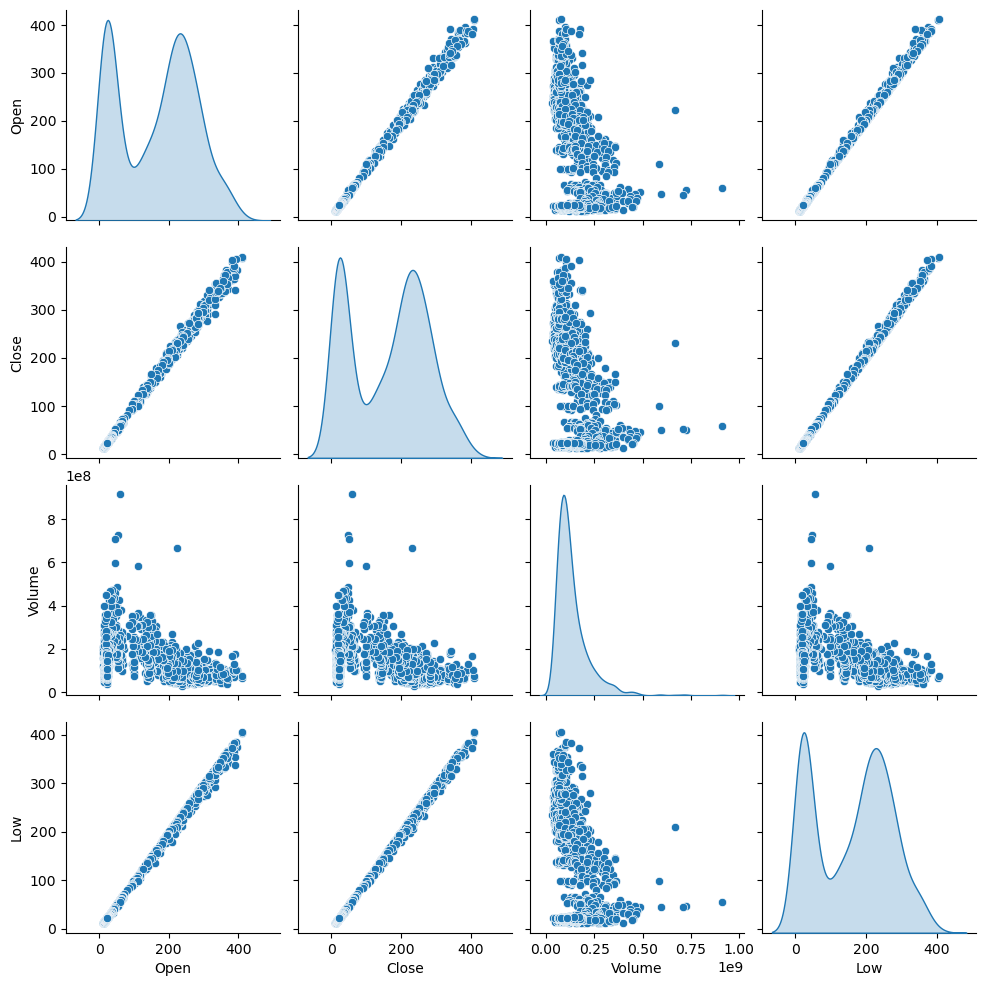

In [35]:
# sns.pairplot can be particularly useful for visualizing relationships and patterns between different stock variables or features.
sns.pairplot(TSLA[['Open','Close', 'Volume', 'High', 'Low']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Low')

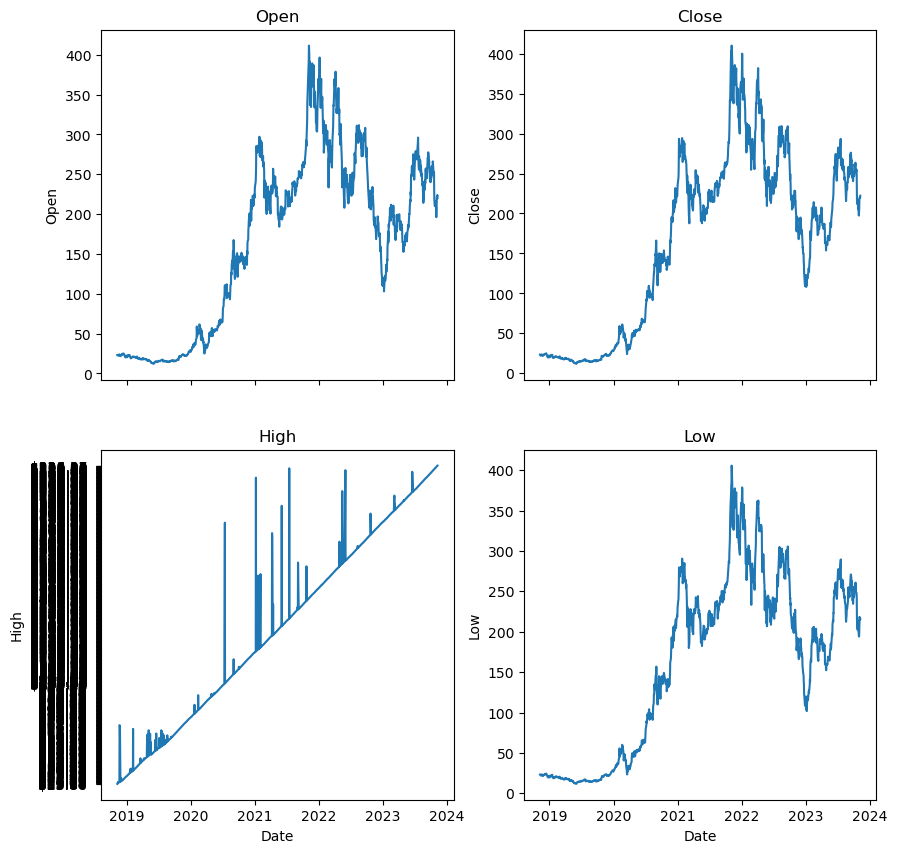

In [36]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
sns.lineplot(ax=axes[0, 0], data = TSLA, x='Date', y='Open')
axes[0,0].set_title('Open')
sns.lineplot(ax=axes[0, 1], data = TSLA, x='Date', y='Close')
axes[0,1].set_title('Close')
sns.lineplot(ax=axes[1, 0], data = TSLA, x='Date', y='High')
axes[1,0].set_title('High')
sns.lineplot(ax=axes[1, 1], data = TSLA, x='Date', y='Low')
axes[1,1].set_title('Low')

# Section 2 - Daily Return Analysis

<Axes: >

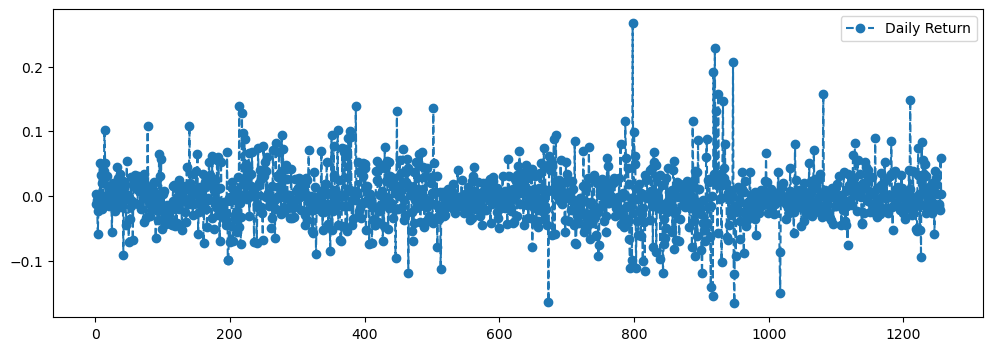

In [37]:
# We'll use pct_change to find the percent change for each day
TSLA['Daily Return'] = TSLA['Close'].pct_change()

# Lets plot the daily return percentage
TSLA['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

# Forecasting the stocks of TESLA

In [38]:
# Convert 'Date' column to datetime format and 'Close' to numeric after removing '$' sign and commas
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
TSLA['Close'] = TSLA['Close'].replace('[\$,]', '', regex=True).astype(float)

# Set 'Date' as the index
TSLA.set_index('Date', inplace=True)

# Resample by week and calculate mean of 'Close'
weekly_mean = TSLA['Close'].resample('W').mean()
 # Display the first few rows of the resulting series

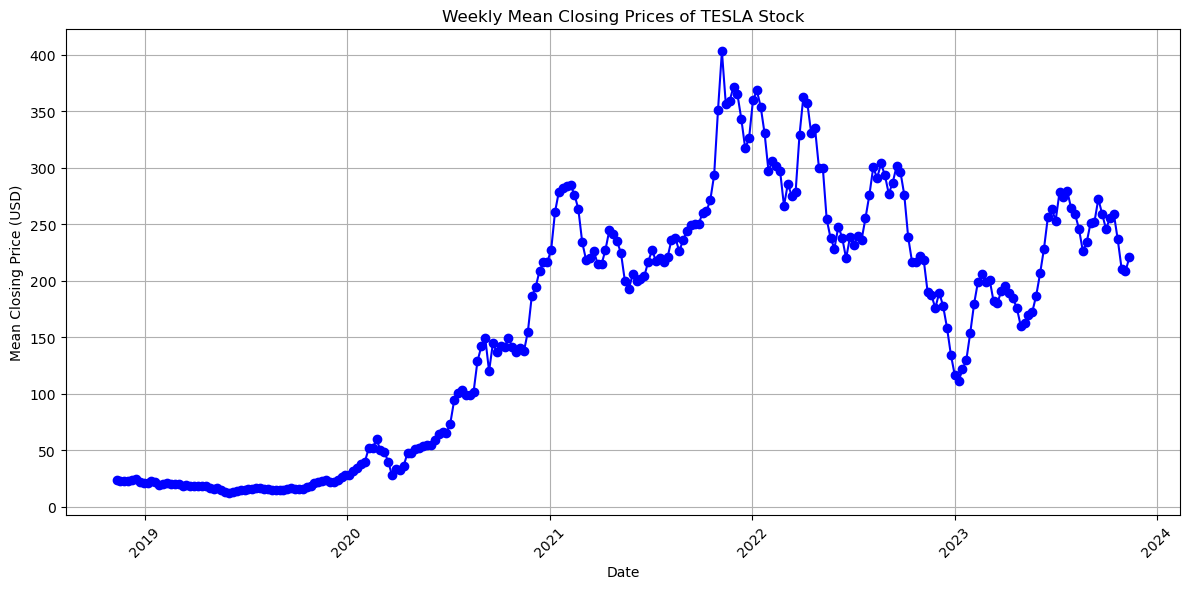

In [39]:
import matplotlib.pyplot as plt

# Plotting the weekly mean closing prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean, marker='o', linestyle='-', color='b')
plt.title('Weekly Mean Closing Prices of TESLA Stock')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


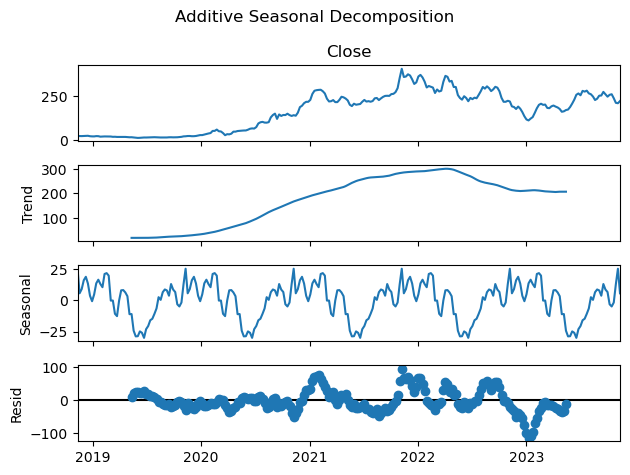

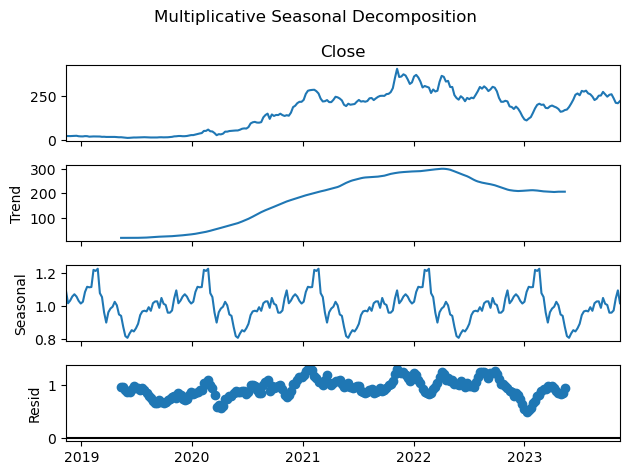

In [40]:
# Repeating the seasonality decomposition using the same variable names as before
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition using additive model
decompose_additive = seasonal_decompose(weekly_mean, model='additive', period=52)

# Decomposition using multiplicative model
decompose_multiplicative = seasonal_decompose(weekly_mean, model='multiplicative', period=52)

# Plotting the results for additive model
decompose_additive.plot()
plt.suptitle('Additive Seasonal Decomposition')
plt.tight_layout()

# Plotting the results for multiplicative model
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decomposition')
plt.tight_layout()

plt.show()


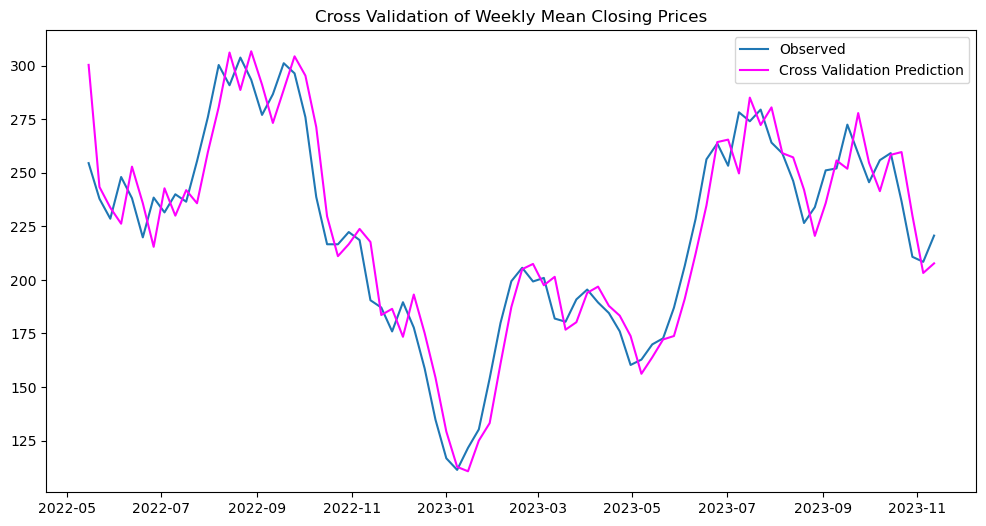

14.94275429931198

In [41]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

# Using the 'weekly_mean' series for the analysis
series = weekly_mean

# Splitting the data into training and test sets
historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

# Converting 'historic' to a list for compatibility with the forecasting loop
historic = historic.to_list()

# Predictions using an autoregressive model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 13, old_names=False)
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test.iloc[i])  # Append actual observation to the historic data

# Creating a Series for the predictions
cross_val = pd.Series(predictions, index=test.index)

# Calculating RMSE
test_score = mean_squared_error(test, cross_val, squared=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation Prediction')
plt.title('Cross Validation of Weekly Mean Closing Prices')
plt.legend()
plt.show()

test_score  # Displaying the RMSE value


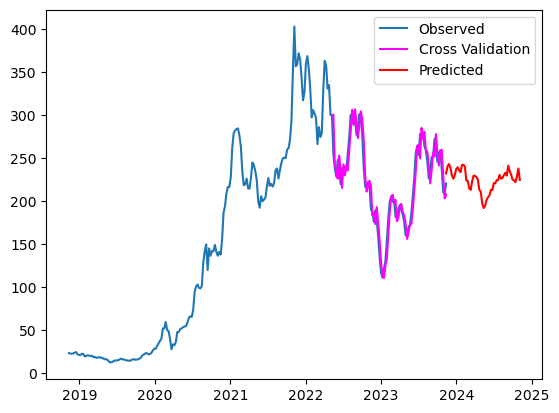

In [42]:
 ## Prediction for the future
#existing data df_w['n_reviews']
historic = series
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2023-11-07", periods=n_pred, freq="w")

sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))
predictions = pd.Series(pred.values, index=date_pred)
# plot results
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 10)
plt.show()

# Amazon DATASET ANALYSIS

In [43]:
AMZ.head()

Date Close/Last    Volume     Open     High       Low
0  11/20/2023    $146.13  41978770  $145.13  $146.63  $144.725
1  11/17/2023    $145.18  49678440  $142.66  $145.23  $142.545
2  11/16/2023    $142.83  49653510  $140.91  $143.32   $139.52
3  11/15/2023    $143.20  63875720  $147.06  $147.29   $142.59
4  11/14/2023    $145.80  56674550  $145.00  $147.26   $144.68

In [44]:
# General Info
AMZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1257 non-null   object
 1   Close/Last  1257 non-null   object
 2   Volume      1257 non-null   int64 
 3   Open        1257 non-null   object
 4   High        1257 non-null   object
 5   Low         1257 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [47]:
#Converting Object datatype to type float
AMZ['Close'] = AMZ['Close'].str.replace('$', '').str.replace(' ', '').astype(float)
AMZ['Open'] = AMZ['Open'].str.replace('$', '').str.replace(' ', '').astype(float)
AMZ['High'] = AMZ['High'].str.replace('$', '').str.replace(' ', '').astype(float)
AMZ['Low'] = AMZ['Low'].str.replace('$', '').str.replace(' ', '').astype(float)

#Converting Object datatype to type datetime

AMZ['Date'] = pd.to_datetime(AMZ['Date'])

In [48]:
AMZ.describe()

Date        Close        Volume         Open  \
count                           1257  1257.000000  1.257000e+03  1257.000000   
mean   2021-05-23 07:39:22.768496384   126.177534  7.793967e+07   126.217828   
min              2018-11-21 00:00:00    67.200000  1.762674e+07    67.300000   
25%              2020-02-25 00:00:00    94.600000  5.443062e+07    94.570000   
50%              2021-05-24 00:00:00   124.720000  6.713754e+07   124.200000   
75%              2022-08-22 00:00:00   158.100000  9.230404e+07   158.350000   
max              2023-11-20 00:00:00   186.570000  3.113456e+08   187.200000   
std                              NaN    31.829491  3.520249e+07    31.916510   

              High          Low  
count  1257.000000  1257.000000  
mean    127.779642   124.545712  
min      69.800000    65.350000  
25%      95.610000    93.430000  
50%     126.340000   123.040000  
75%     159.940000   156.250000  
max     188.650000   184.840000  
std      32.202306    31.542196

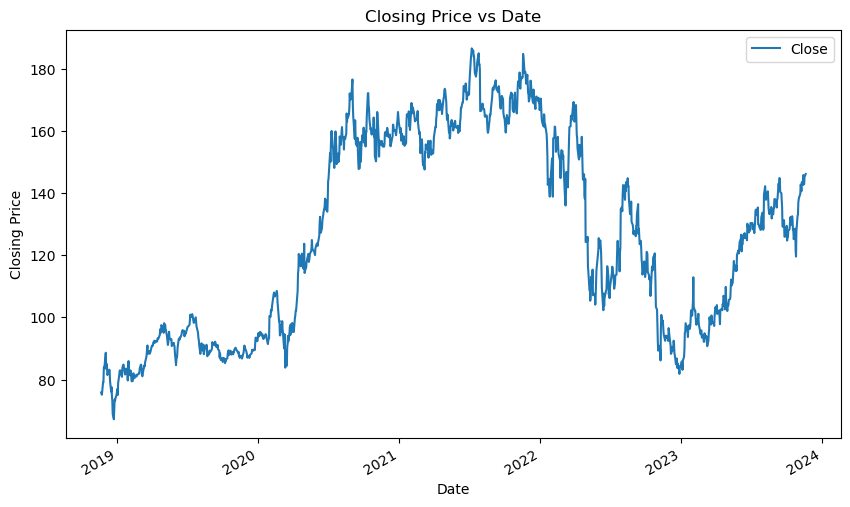

In [49]:
# Let's see a historical view of the closing price

AMZ.plot(x='Date', y='Close', figsize=(10, 6), title='Closing Price vs Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

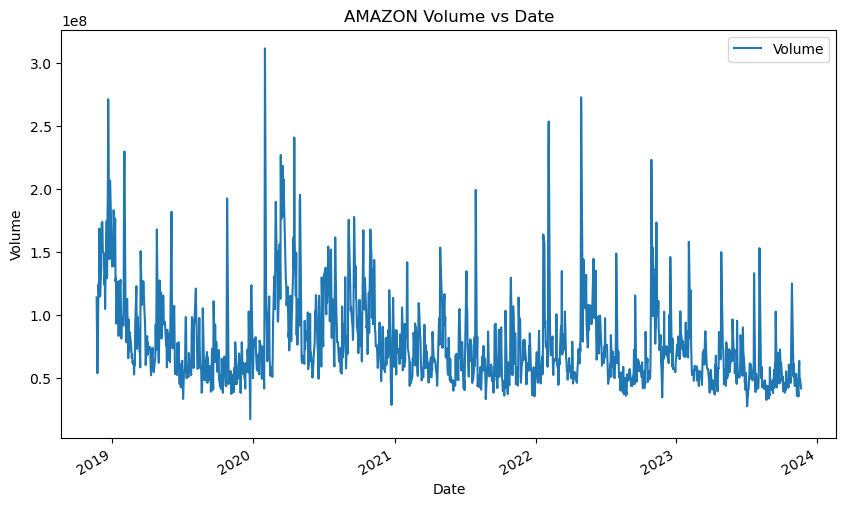

In [50]:
# Now let's plot the total volume of stock being traded each day over the past 5 year

AMZ.plot(x='Date', y='Volume', figsize=(10, 6), title='AMAZON Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

C:\Users\kce52\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


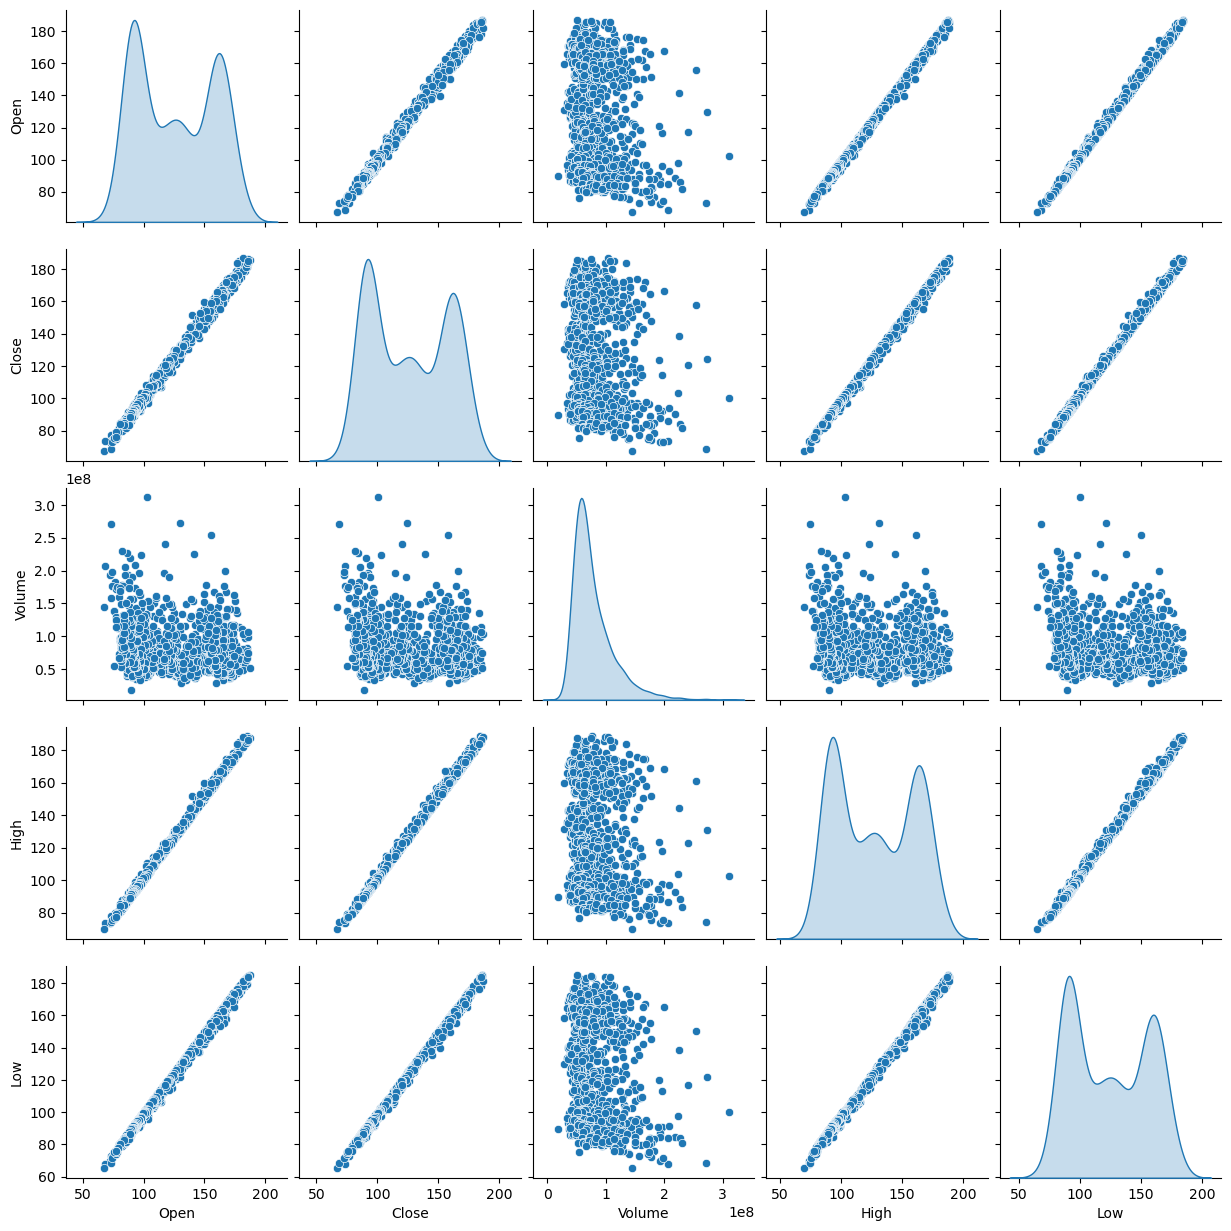

In [51]:
# sns.pairplot can be particularly useful for visualizing relationships and patterns between different stock variables or features.
sns.pairplot(AMZ[['Open','Close', 'Volume', 'High', 'Low']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Low')

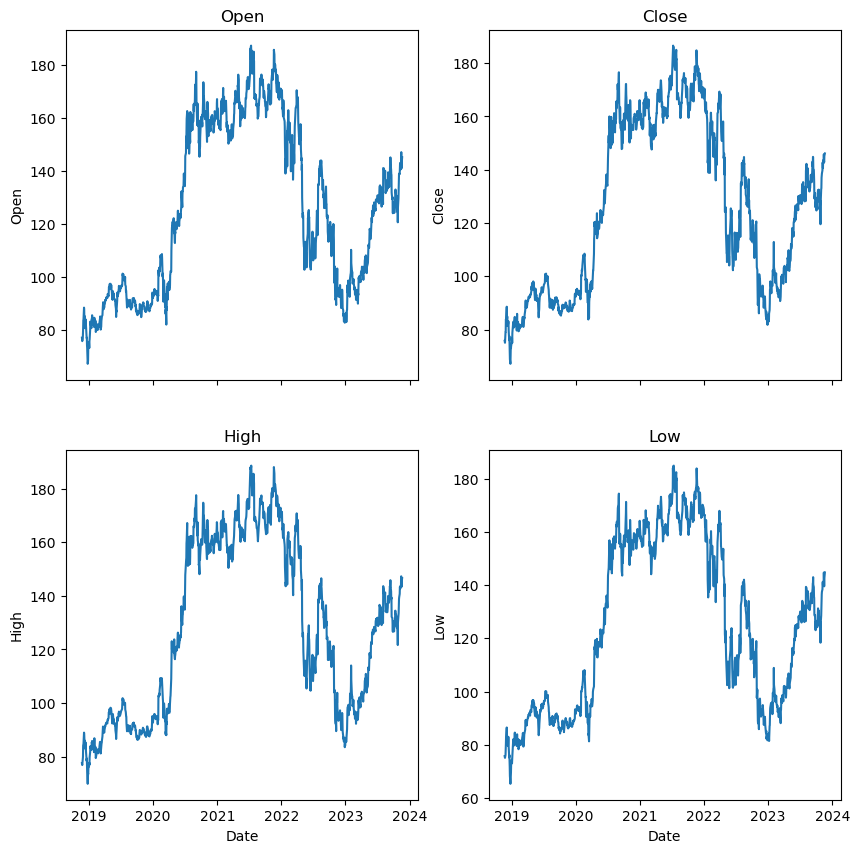

In [52]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
sns.lineplot(ax=axes[0, 0], data = AMZ, x='Date', y='Open')
axes[0,0].set_title('Open')
sns.lineplot(ax=axes[0, 1], data = AMZ, x='Date', y='Close')
axes[0,1].set_title('Close')
sns.lineplot(ax=axes[1, 0], data = AMZ, x='Date', y='High')
axes[1,0].set_title('High')
sns.lineplot(ax=axes[1, 1], data = AMZ, x='Date', y='Low')
axes[1,1].set_title('Low')

# Section 2 - Daily Return Analysis

<Axes: >

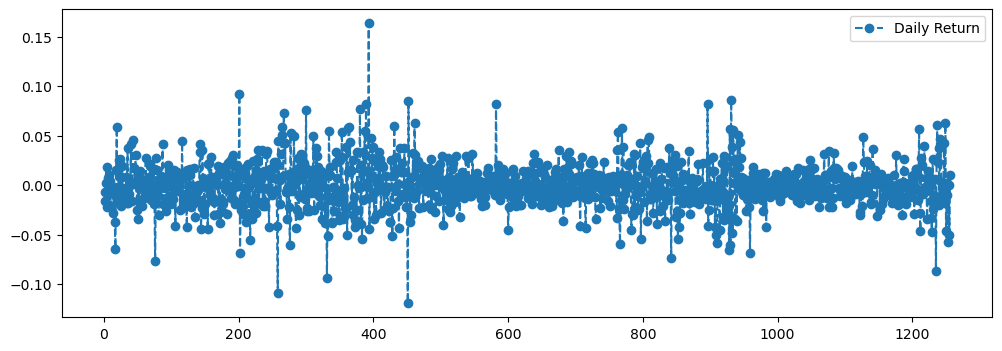

In [53]:
# We'll use pct_change to find the percent change for each day
AMZ['Daily Return'] = AMZ['Close'].pct_change()

# Lets plot the daily return percentage
AMZ['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

# Forecasting the stocks of AMAZON

In [54]:
# Convert 'Date' column to datetime format and 'Close' to numeric after removing '$' sign and commas
AMZ['Date'] = pd.to_datetime(AMZ['Date'])
AMZ['Close'] = AMZ['Close'].replace('[\$,]', '', regex=True).astype(float)

# Set 'Date' as the index
AMZ.set_index('Date', inplace=True)

# Resample by week and calculate mean of 'Close'
weekly_mean = AMZ['Close'].resample('W').mean()
 # Display the first few rows of the resulting series

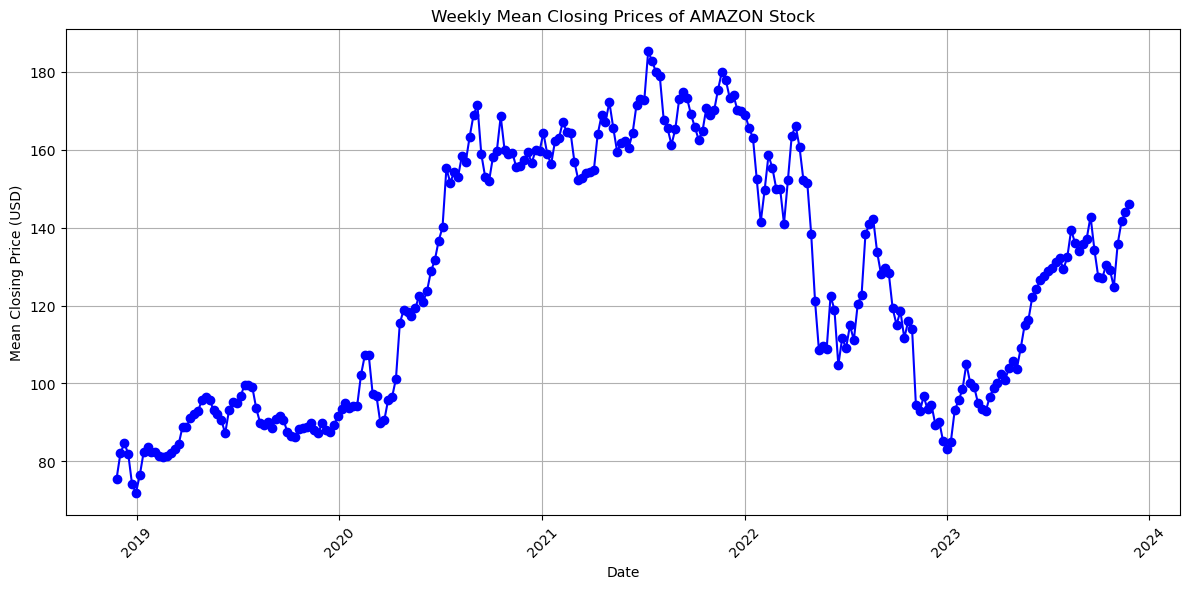

In [55]:
import matplotlib.pyplot as plt

# Plotting the weekly mean closing prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean, marker='o', linestyle='-', color='b')
plt.title('Weekly Mean Closing Prices of AMAZON Stock')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


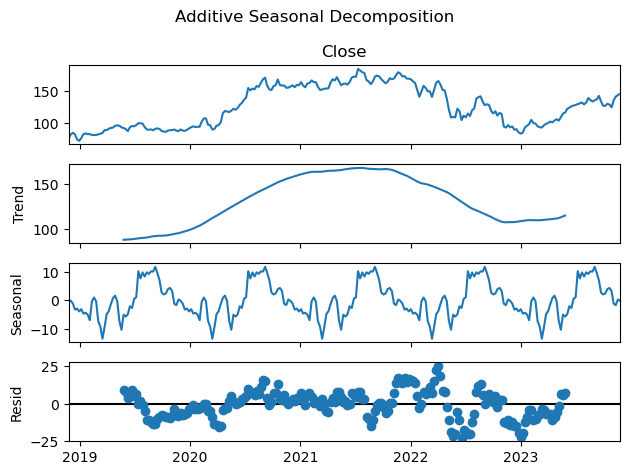

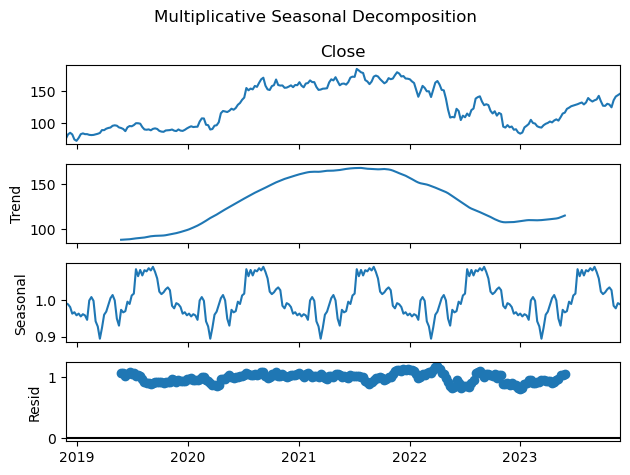

In [56]:
# Repeating the seasonality decomposition using the same variable names as before
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition using additive model
decompose_additive = seasonal_decompose(weekly_mean, model='additive', period=52)

# Decomposition using multiplicative model
decompose_multiplicative = seasonal_decompose(weekly_mean, model='multiplicative', period=52)

# Plotting the results for additive model
decompose_additive.plot()
plt.suptitle('Additive Seasonal Decomposition')
plt.tight_layout()

# Plotting the results for multiplicative model
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decomposition')
plt.tight_layout()

plt.show()


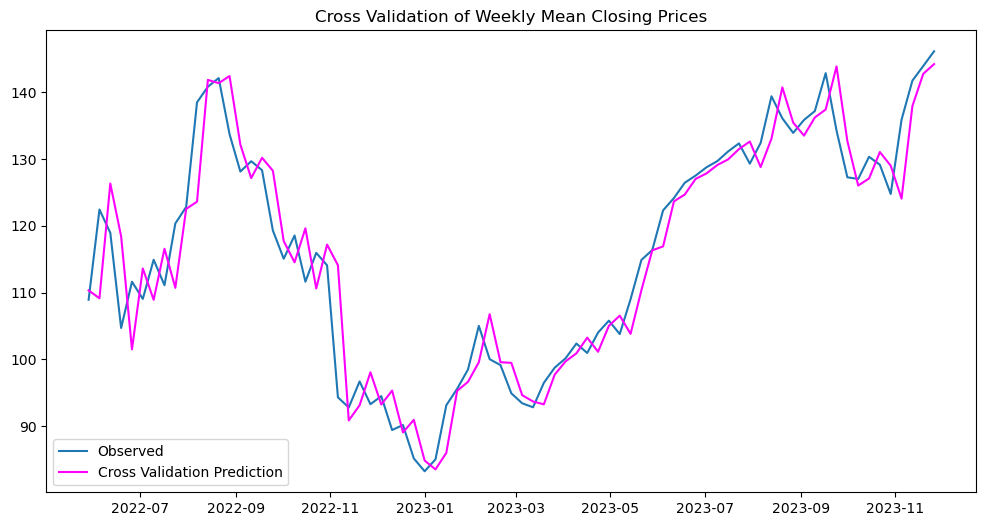

5.566652498729643

In [57]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

# Using the 'weekly_mean' series for the analysis
series = weekly_mean

# Splitting the data into training and test sets
historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

# Converting 'historic' to a list for compatibility with the forecasting loop
historic = historic.to_list()

# Predictions using an autoregressive model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 13, old_names=False)
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test.iloc[i])  # Append actual observation to the historic data

# Creating a Series for the predictions
cross_val = pd.Series(predictions, index=test.index)

# Calculating RMSE
test_score = mean_squared_error(test, cross_val, squared=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation Prediction')
plt.title('Cross Validation of Weekly Mean Closing Prices')
plt.legend()
plt.show()

test_score   # Displaying the RMSE value


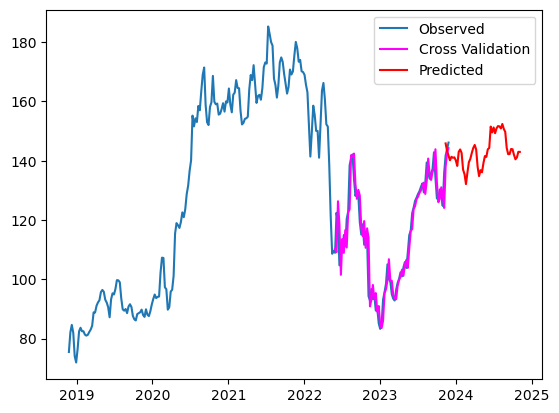

In [58]:
 ## Prediction for the future
#existing data df_w['n_reviews']
historic = series
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2023-11-07", periods=n_pred, freq="w")

sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))
predictions = pd.Series(pred.values, index=date_pred)
# plot results
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 10)
plt.show()

# Netflix DATASET ANALYSIS

In [59]:
NFLX.head()

Date     Close   Volume      Open      High       Low
0  11/7/2023  $434.61   3291064  $436.18   $437.64   $431.00 
1  11/6/2023  $434.74   3003235  $434.38   $435.03   $429.61 
2  11/3/2023  $432.36   3667051  $428.76   $434.82   $425.53 
3  11/2/2023  $424.71   4475984  $421.17   $426.69   $417.10 
4  11/1/2023  $420.19   4806108  $414.77   $420.60   $414.18

In [60]:
# General Info
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1257 non-null   object
 1   Close   1257 non-null   object
 2   Volume  1257 non-null   int64 
 3   Open    1257 non-null   object
 4   High    1257 non-null   object
 5   Low     1257 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [61]:
#Converting Object datatype to type float
NFLX['Close'] = NFLX['Close'].str.replace('$', '').str.replace(' ', '').astype(float)
NFLX['Open'] = NFLX['Open'].str.replace('$', '').str.replace(' ', '').astype(float)
NFLX['High'] = NFLX['High'].str.replace('$', '').str.replace(' ', '').astype(float)
NFLX['Low'] = NFLX['Low'].str.replace('$', '').str.replace(' ', '').astype(float)

#Converting Object datatype to type datetime

NFLX['Date'] = pd.to_datetime(NFLX['Date'])

In [62]:
NFLX.describe()

Date        Close        Volume         Open  \
count                           1257  1257.000000  1.257000e+03  1257.000000   
mean   2021-05-10 05:57:25.346062080   396.382864  7.437255e+06   396.325378   
min              2018-11-08 00:00:00   166.370000  1.143952e+06   163.960000   
25%              2020-02-11 00:00:00   312.030000  4.177357e+06   310.960000   
50%              2021-05-11 00:00:00   372.280000  5.840541e+06   373.500000   
75%              2022-08-09 00:00:00   494.660000  8.615906e+06   495.000000   
max              2023-11-07 00:00:00   691.690000  1.333875e+08   692.350000   
std                              NaN   116.441902  6.469016e+06   116.741178   

              High          Low  
count  1257.000000  1257.000000  
mean    402.516675   390.023278  
min     172.060000   162.710000  
25%     316.500000   305.300000  
50%     378.960000   366.190000  
75%     503.090000   487.780000  
max     700.990000   686.090000  
std     117.420940   115.640334

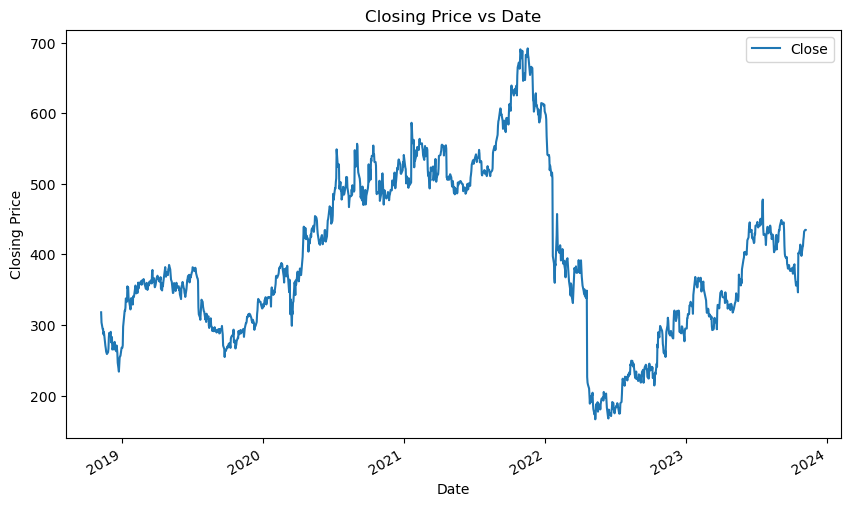

In [63]:
# Let's see a historical view of the closing price

NFLX.plot(x='Date', y='Close', figsize=(10, 6), title='Closing Price vs Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

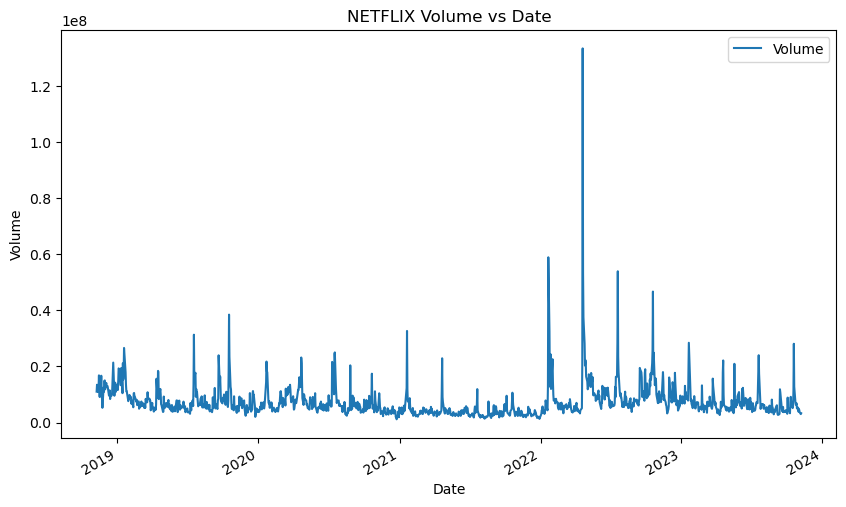

In [64]:
# Now let's plot the total volume of stock being traded each day over the past 5 year

NFLX.plot(x='Date', y='Volume', figsize=(10, 6), title='NETFLIX Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

C:\Users\kce52\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


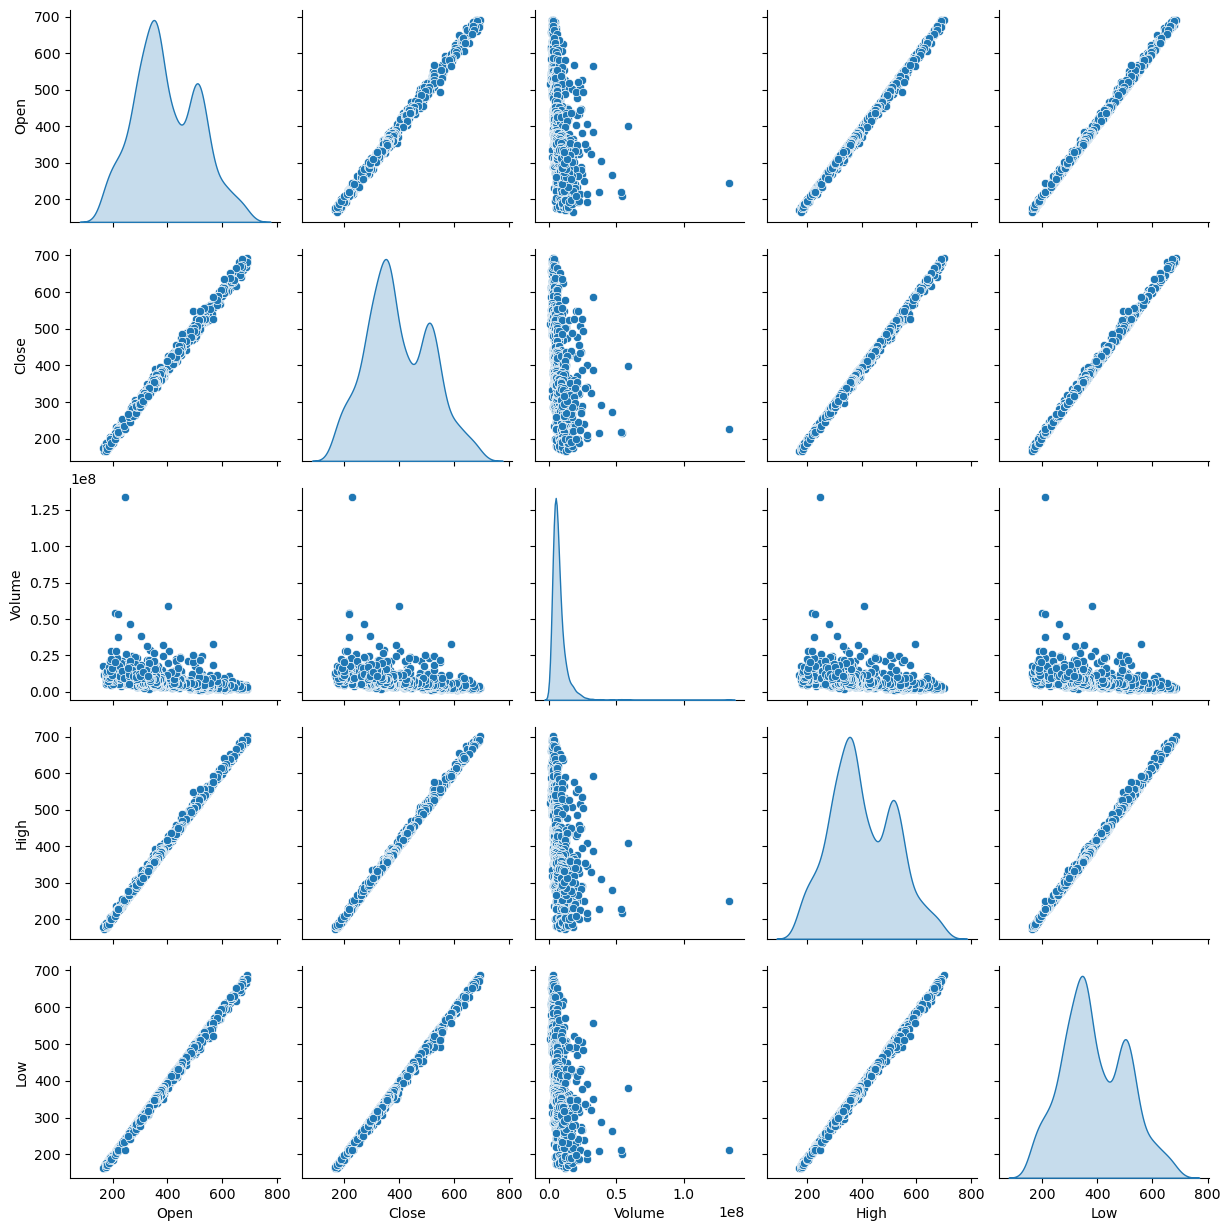

In [65]:
# sns.pairplot can be particularly useful for visualizing relationships and patterns between different stock variables or features.
sns.pairplot(NFLX[['Open','Close', 'Volume', 'High', 'Low']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Low')

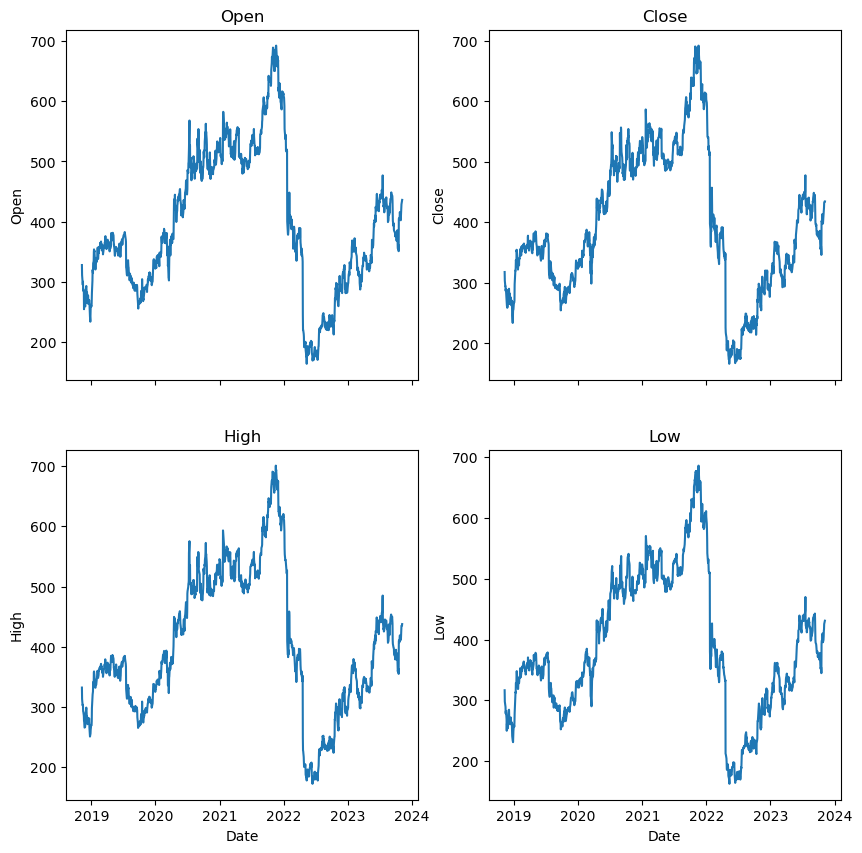

In [66]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
sns.lineplot(ax=axes[0, 0], data = NFLX, x='Date', y='Open')
axes[0,0].set_title('Open')
sns.lineplot(ax=axes[0, 1], data = NFLX, x='Date', y='Close')
axes[0,1].set_title('Close')
sns.lineplot(ax=axes[1, 0], data = NFLX, x='Date', y='High')
axes[1,0].set_title('High')
sns.lineplot(ax=axes[1, 1], data = NFLX, x='Date', y='Low')
axes[1,1].set_title('Low')

# Section 2 - Daily Return Analysis

<Axes: >

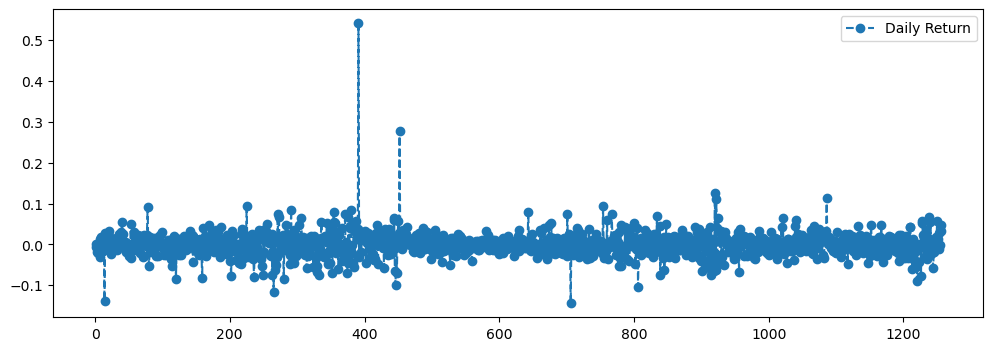

In [67]:
# We'll use pct_change to find the percent change for each day
NFLX['Daily Return'] = NFLX['Close'].pct_change()

# Lets plot the daily return percentage
NFLX['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

# Forecasting the stocks of NETFLIX

In [72]:
# Convert 'Date' column to datetime format and 'Close' to numeric after removing '$' sign and commas
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX['Close'] = NFLX['Close'].replace('[\$,]', '', regex=True).astype(float)

# Set 'Date' as the index
NFLX.set_index('Date', inplace=True)

# Resample by week and calculate mean of 'Close'
weekly_mean = NFLX['Close'].resample('W').mean()
 # Display the first few rows of the resulting series

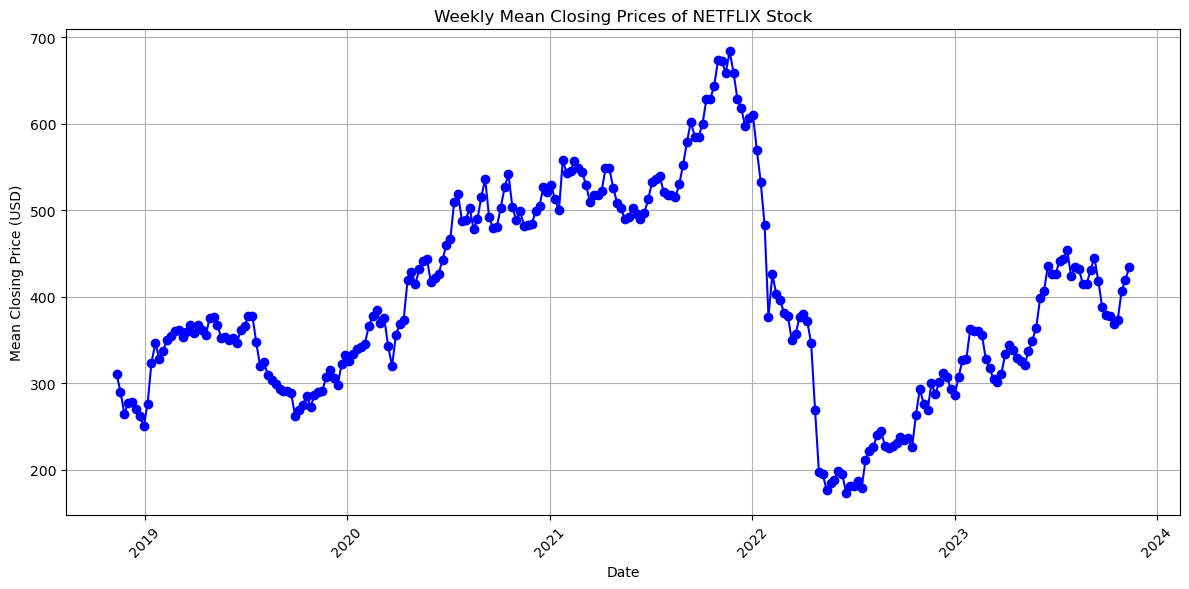

In [73]:
import matplotlib.pyplot as plt

# Plotting the weekly mean closing prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean, marker='o', linestyle='-', color='b')
plt.title('Weekly Mean Closing Prices of NETFLIX Stock')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\kce52\AppData\Local\Temp\ipykernel_15968\1348494659.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


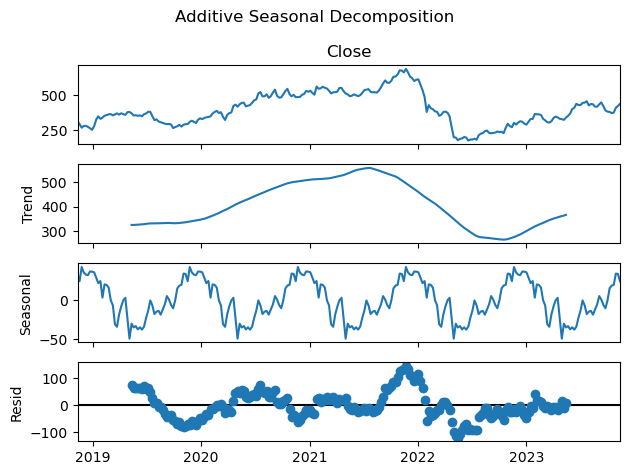

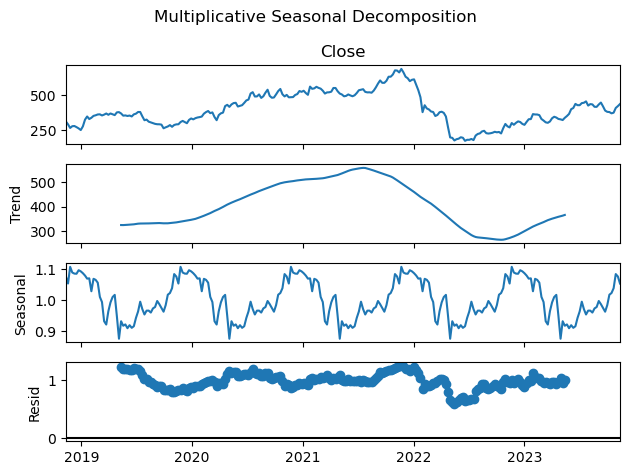

In [74]:
# Repeating the seasonality decomposition using the same variable names as before
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition using additive model
decompose_additive = seasonal_decompose(weekly_mean, model='additive', period=52)

# Decomposition using multiplicative model
decompose_multiplicative = seasonal_decompose(weekly_mean, model='multiplicative', period=52)

# Plotting the results for additive model
decompose_additive.plot()
plt.suptitle('Additive Seasonal Decomposition')
plt.tight_layout()

# Plotting the results for multiplicative model
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decomposition')
plt.tight_layout()

plt.show()


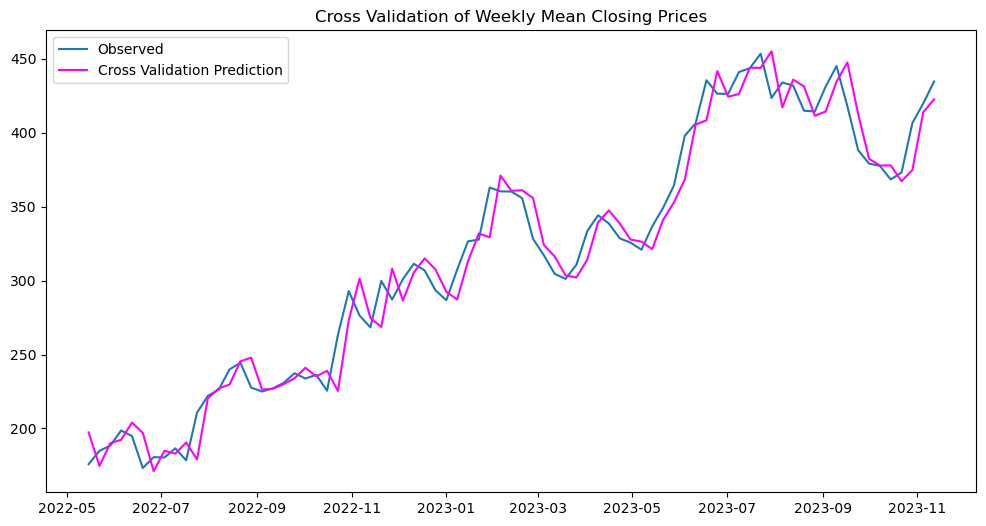

15.354402405562467

In [75]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

# Using the 'weekly_mean' series for the analysis
series = weekly_mean

# Splitting the data into training and test sets
historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

# Converting 'historic' to a list for compatibility with the forecasting loop
historic = historic.to_list()

# Predictions using an autoregressive model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 13, old_names=False)
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test.iloc[i])  # Append actual observation to the historic data

# Creating a Series for the predictions
cross_val = pd.Series(predictions, index=test.index)

# Calculating RMSE
test_score = mean_squared_error(test, cross_val, squared=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation Prediction')
plt.title('Cross Validation of Weekly Mean Closing Prices')
plt.legend()
plt.show()

test_score  # Displaying the RMSE value


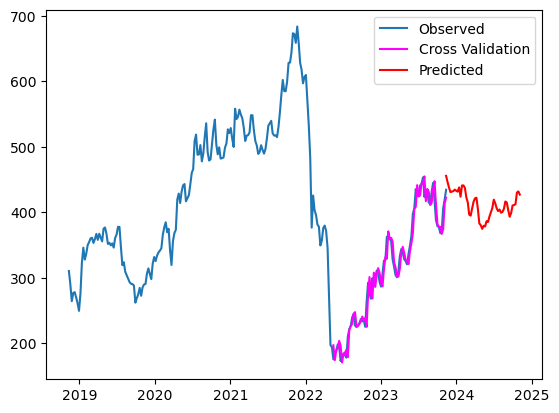

In [76]:
 ## Prediction for the future
#existing data df_w['n_reviews']
historic = series
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2023-11-07", periods=n_pred, freq="w")

sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))
predictions = pd.Series(pred.values, index=date_pred)
# plot results
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 10)
plt.show()

# Prescriptive Analysis

In [ ]:
 pip install yfinance

In [1]:
import pandas as pd
import yfinance as yf  

# Define the list of stock tickers
stock_tickers = ['AAPL', 'TSLA', 'NFLX', 'META','AMZ']

# Download historical price data using yfinance
prices = yf.download(stock_tickers, start='2018-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

[*********************100%%**********************]  5 of 5 completed
Correlation Matrix:
          AAPL       AMZ      META      NFLX      TSLA
AAPL  1.000000  0.003623  0.584575  0.482989  0.466155
AMZ   0.003623  1.000000  0.004601  0.006442  0.025071
META  0.584575  0.004601  1.000000  0.525794  0.339746
NFLX  0.482989  0.006442  0.525794  1.000000  0.381368
TSLA  0.466155  0.025071  0.339746  0.381368  1.000000


In [2]:
# Calculate expected returns as the mean of historical returns
expected_returns = returns.mean()
expected_returns

AAPL    0.001141
AMZ    -0.000711
META    0.000056
NFLX    0.000773
TSLA    0.002243
dtype: float64

In [5]:
# Calculate standard deviation
standard_deviations = returns.std()
standard_deviations

AAPL    0.021094
AMZ     0.028310
META    0.027233
NFLX    0.030067
TSLA    0.041287
dtype: float64

Question : 2

In [6]:
# Calculate Sharpe ratio
sharpe_ratio = sum(expected_returns) / sum(standard_deviations)

# Calculate expected risk tolerance
expected_risk_tolerance = sharpe_ratio * sum(standard_deviations)

# Print the result
print("Expected Risk Tolerance:", expected_risk_tolerance)

Expected Risk Tolerance: 0.0035017833157900335


In [13]:
from scipy.optimize import minimize

# Assuming you have expected_returns, standard_deviations, and correlation_matrix already defined
# Also assuming you have calculated expected_risk_tolerance as shown in the previous response

# Target return
target_return = 0.06

# Initial weights
initial_weights = [0, 0, 0, 0, 0]  # Adjust weights based on your strategy

# Define the objective function
def objective(weights):
    portfolio_return = sum(weights[i] * expected_returns[i] for i in range(5))
    return -portfolio_return  # Minimize negative return to maximize actual return

# Define constraints
constraints = [
    {'type': 'eq', 'fun': lambda weights: sum(weights) - 1},
    {'type': 'eq', 'fun': lambda weights: sum(weights[i] * expected_returns[i] for i in range(5)) - target_return},
    {'type': 'ineq', 'fun': lambda weights: expected_risk_tolerance - sum(weights[i] * standard_deviations[i] for i in range(5))}
]

# Optimize the portfolio
result = minimize(objective, initial_weights, method='SLSQP', constraints=constraints)

# Extract optimal weights
optimal_weights = result.x

print("Optimal Weights:", optimal_weights)

Optimal Weights: [ 20.88629221 -22.28518717  -7.33017482   0.73475698   8.99431279]


Question 1:

In [18]:
from scipy.optimize import minimize

# Define expected returns, standard deviations, and correlation matrix
#standard_deviations = standard_deviation.tolist()
#expected_returns = expected_returns.tolist()
correlation_matrix = [[1.000000 , 0.695904 , 0.592901 , 0.500008 , 0.637218],
                      [0.695904 , 1.000000,  0.605782 , 0.580900 , 0.591533],
                      [0.592901,  0.605782,  1.000000 , 0.568349 ,0.398646],
                      [0.500008,  0.580900,  0.568349 , 1.000000 , 0.517083],
                      [0.637218,  0.591533,  0.398646,  0.517083 , 1.000000]]                      

# Target return
target_return = 0.06

# Initial weights
initial_weights = [0,0,0,0,0]  # Adjust weights based on your strategy

# Define the objective function
def objective(weights):
    portfolio_risk = sum(sum(weights[i] * weights[j] * standard_deviations[i] * standard_deviations[j] * correlation_matrix[i][j] for j in range(5)) for i in range(5))
    return portfolio_risk

# Define constraints
constraints = [{'type': 'eq', 'fun': lambda weights: sum(weights) - 1}, 
               {'type': 'eq', 'fun': lambda weights: sum(weights[i] * expected_returns[i] for i in range(5)) - target_return}]

# Optimize the portfolio
result = minimize(objective, initial_weights, method='SLSQP', constraints=constraints)

# Extract optimal weights
optimal_weights = result.x

print("Optimal Weights:", optimal_weights)

Optimal Weights: [ 17.98479862 -25.39846347  -3.48793939   3.45117245   8.4504318 ]


In [19]:
17.98479862 + -25.39846347 + -3.48793939  + 3.45117245  + 8.4504318 

1.000000009999999